In [1]:
import numpy as np, matplotlib.pyplot as plt
import sys; sys.path.append("../src2")
from pendulum import *
import pickle

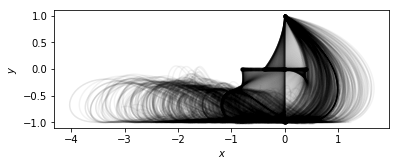

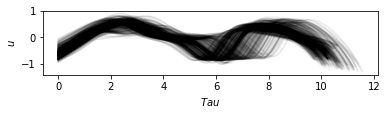

In [76]:
# load optimal control data
trajs = np.load("energy_walks_alpha.npy")
ax1 = plot_traj(trajs[-1][:,1:5], arm=True)
ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$y$")
ax2 = plot_controls(trajs[-1][:,0], trajs[-1][:,-1])
ax2.set_xlabel(r"$Tau$")
ax2.set_ylabel(r"$u$")
for traj in trajs:
    t = traj[:,0]
    x = traj[:,1:5]
    u = traj[:,-1]
    plot_traj(x, ax=ax1, alpha=0.05)
    plot_controls(t, u, ax=ax2, alpha=0.05)

In [107]:
# format data for neural network
db = data(np.vstack(trajs), [1,2,3,4], [-1])
db.i.shape

torch.Size([354918, 4])

In [4]:
# instantiate neural network
nn = mlp([4, 50, 50, 50, 1])

In [115]:
# train on GPU
nn.train_gpu(db.i[:5000,:], db.o[:5000,:], epo=20000, lr=1e-3)

Episode 0; Testing Loss 0.005884160985343454; Training Loss 0.004794387821959924
Episode 1; Testing Loss 0.005884218183143108; Training Loss 0.004794384494254969
Episode 2; Testing Loss 0.00588422679634794; Training Loss 0.004794385865203296
Episode 3; Testing Loss 0.0058841821021413205; Training Loss 0.004794382976391512
Episode 4; Testing Loss 0.00588416378776544; Training Loss 0.00479437980964613
Episode 5; Testing Loss 0.005884245782768113; Training Loss 0.004794373949302251
Episode 6; Testing Loss 0.0058842910110231475; Training Loss 0.004794370055154585
Episode 7; Testing Loss 0.005884239225782648; Training Loss 0.004794362804256742
Episode 8; Testing Loss 0.005884187238419011; Training Loss 0.00479435717830755
Episode 9; Testing Loss 0.005884214475042917; Training Loss 0.004794349847953296
Episode 10; Testing Loss 0.005884241991625032; Training Loss 0.004794344077368118
Episode 11; Testing Loss 0.005884184737951667; Training Loss 0.0047943373863431294
Episode 12; Testing Loss 0.

Episode 187; Testing Loss 0.0058830031203659545; Training Loss 0.004792478475091347
Episode 188; Testing Loss 0.005882991517148623; Training Loss 0.004792465563361731
Episode 189; Testing Loss 0.005882917492475668; Training Loss 0.004792452194494648
Episode 190; Testing Loss 0.005882921850815568; Training Loss 0.004792442068479462
Episode 191; Testing Loss 0.005882969302266813; Training Loss 0.0047924328264499745
Episode 192; Testing Loss 0.005882952303140911; Training Loss 0.0047924219440018834
Episode 193; Testing Loss 0.005882844872045354; Training Loss 0.0047924103745041755
Episode 194; Testing Loss 0.00588281164581718; Training Loss 0.004792400071946708
Episode 195; Testing Loss 0.005882887566418256; Training Loss 0.004792389805551975
Episode 196; Testing Loss 0.005882958014962906; Training Loss 0.004792379705354753
Episode 197; Testing Loss 0.005882900983779262; Training Loss 0.004792366322346158
Episode 198; Testing Loss 0.005882798834567954; Training Loss 0.004792357050612001
E

Episode 385; Testing Loss 0.005882099305242133; Training Loss 0.004790317369971497
Episode 386; Testing Loss 0.005882093379041107; Training Loss 0.004790304085718229
Episode 387; Testing Loss 0.005882098057811021; Training Loss 0.004790289873281444
Episode 388; Testing Loss 0.005882131408489812; Training Loss 0.004790278618919645
Episode 389; Testing Loss 0.005882130243696901; Training Loss 0.004790268808374391
Episode 390; Testing Loss 0.00588208917479872; Training Loss 0.004790257366977871
Episode 391; Testing Loss 0.005882018606355848; Training Loss 0.004790244548721004
Episode 392; Testing Loss 0.005882011710058531; Training Loss 0.004790234117959056
Episode 393; Testing Loss 0.005882129277471205; Training Loss 0.004790223223873164
Episode 394; Testing Loss 0.005882170138452334; Training Loss 0.004790213994657566
Episode 395; Testing Loss 0.005882107733023414; Training Loss 0.0047902021053263955
Episode 396; Testing Loss 0.0058820469765667426; Training Loss 0.004790191862401898
Epi

Episode 487; Testing Loss 0.005881859574555774; Training Loss 0.004789141493878144
Episode 488; Testing Loss 0.005881974466228619; Training Loss 0.004789129104360224
Episode 489; Testing Loss 0.0058819123984319285; Training Loss 0.004789118605233432
Episode 490; Testing Loss 0.005881812095678281; Training Loss 0.004789107009728007
Episode 491; Testing Loss 0.005881799496525265; Training Loss 0.0047890945725412
Episode 492; Testing Loss 0.0058818844880318116; Training Loss 0.004789083124222771
Episode 493; Testing Loss 0.005881952001367869; Training Loss 0.004789072257732097
Episode 494; Testing Loss 0.005881892466168258; Training Loss 0.004789058884318568
Episode 495; Testing Loss 0.005881880491104898; Training Loss 0.004789047286184438
Episode 496; Testing Loss 0.0058819166055736425; Training Loss 0.004789036464557489
Episode 497; Testing Loss 0.0058819667515538; Training Loss 0.0047890240787696586
Episode 498; Testing Loss 0.005881926884015213; Training Loss 0.004789012177386703
Epis

Episode 588; Testing Loss 0.005881705947654144; Training Loss 0.004787971090017154
Episode 589; Testing Loss 0.0058817347432268815; Training Loss 0.004787957594214543
Episode 590; Testing Loss 0.005881632589971996; Training Loss 0.004787947814110794
Episode 591; Testing Loss 0.005881604507042207; Training Loss 0.004787937321923794
Episode 592; Testing Loss 0.005881746246972682; Training Loss 0.0047879246801775565
Episode 593; Testing Loss 0.005881804961263182; Training Loss 0.004787915390761213
Episode 594; Testing Loss 0.005881694696296081; Training Loss 0.0047879020125301056
Episode 595; Testing Loss 0.0058815727433837; Training Loss 0.0047878919525160425
Episode 596; Testing Loss 0.005881572495872216; Training Loss 0.004787879979024209
Episode 597; Testing Loss 0.005881640416759313; Training Loss 0.004787869372936858
Episode 598; Testing Loss 0.005881616972455396; Training Loss 0.004787856873950625
Episode 599; Testing Loss 0.005881553474281481; Training Loss 0.00478784753955567
Epi

Episode 689; Testing Loss 0.00588120616961832; Training Loss 0.004786829019501503
Episode 690; Testing Loss 0.005881139465059967; Training Loss 0.004786818439551018
Episode 691; Testing Loss 0.005881118153018868; Training Loss 0.004786807333018523
Episode 692; Testing Loss 0.005881207216866005; Training Loss 0.004786796259154193
Episode 693; Testing Loss 0.005881249209742909; Training Loss 0.004786785544990711
Episode 694; Testing Loss 0.00588115681963029; Training Loss 0.004786771664032003
Episode 695; Testing Loss 0.005881071580817555; Training Loss 0.004786761381133784
Episode 696; Testing Loss 0.005881062126128397; Training Loss 0.004786750476895279
Episode 697; Testing Loss 0.005881119361259088; Training Loss 0.004786739219178522
Episode 698; Testing Loss 0.005881185248414543; Training Loss 0.004786726900204101
Episode 699; Testing Loss 0.005881189793112188; Training Loss 0.004786716362406471
Episode 700; Testing Loss 0.005881104666941307; Training Loss 0.004786704498238577
Episod

Episode 790; Testing Loss 0.005880558149465172; Training Loss 0.004785703110239698
Episode 791; Testing Loss 0.005880587643953853; Training Loss 0.004785689923781585
Episode 792; Testing Loss 0.005880487629113545; Training Loss 0.004785679102541637
Episode 793; Testing Loss 0.0058803903488040665; Training Loss 0.004785668574111358
Episode 794; Testing Loss 0.005880481348057823; Training Loss 0.004785656220938578
Episode 795; Testing Loss 0.005880594492021798; Training Loss 0.0047856474615186745
Episode 796; Testing Loss 0.005880501867344236; Training Loss 0.0047856340362889375
Episode 797; Testing Loss 0.005880383103717549; Training Loss 0.00478562371003815
Episode 798; Testing Loss 0.005880449942402249; Training Loss 0.004785612609922117
Episode 799; Testing Loss 0.0058805238538677815; Training Loss 0.004785603635003164
Episode 800; Testing Loss 0.005880453226222354; Training Loss 0.004785590425251976
Episode 801; Testing Loss 0.0058803954020665745; Training Loss 0.004785579371712619


Episode 892; Testing Loss 0.005879730819974267; Training Loss 0.00478457877578187
Episode 893; Testing Loss 0.005879594229486845; Training Loss 0.004784569257098179
Episode 894; Testing Loss 0.005879603808160927; Training Loss 0.004784557176644626
Episode 895; Testing Loss 0.005879669984576591; Training Loss 0.004784545062135919
Episode 896; Testing Loss 0.005879664501483019; Training Loss 0.00478453653712094
Episode 897; Testing Loss 0.005879623332945032; Training Loss 0.004784525882357338
Episode 898; Testing Loss 0.005879601642534924; Training Loss 0.004784514171032989
Episode 899; Testing Loss 0.005879589445647571; Training Loss 0.004784501905451272
Episode 900; Testing Loss 0.005879563487012807; Training Loss 0.004784493476514891
Episode 901; Testing Loss 0.005879635450897506; Training Loss 0.004784481284179141
Episode 902; Testing Loss 0.005879646794131977; Training Loss 0.004784467973768409
Episode 903; Testing Loss 0.005879522889497271; Training Loss 0.004784459514662977
Episod

Episode 994; Testing Loss 0.005879047980292469; Training Loss 0.004783452662711391
Episode 995; Testing Loss 0.005879039187368014; Training Loss 0.004783441171395775
Episode 996; Testing Loss 0.005879112309138917; Training Loss 0.004783429533245004
Episode 997; Testing Loss 0.0058791258631337604; Training Loss 0.004783417254414561
Episode 998; Testing Loss 0.005879059355611242; Training Loss 0.0047834082707547
Episode 999; Testing Loss 0.005879045588249225; Training Loss 0.0047833986837492876
Episode 1000; Testing Loss 0.005879079729698189; Training Loss 0.004783385347161322
Episode 1001; Testing Loss 0.005879097909498317; Training Loss 0.004783372625788717
Episode 1002; Testing Loss 0.005879085801427946; Training Loss 0.004783362989651331
Episode 1003; Testing Loss 0.0058790558884295446; Training Loss 0.004783350695093851
Episode 1004; Testing Loss 0.005878975432481223; Training Loss 0.004783339530136883
Episode 1005; Testing Loss 0.005878984943681528; Training Loss 0.0047833286794800

Episode 1096; Testing Loss 0.005878684001703731; Training Loss 0.0047823226561807914
Episode 1097; Testing Loss 0.005878658369514152; Training Loss 0.004782310307161735
Episode 1098; Testing Loss 0.005878716330721309; Training Loss 0.004782300861899379
Episode 1099; Testing Loss 0.005878725167384014; Training Loss 0.004782289806736716
Episode 1100; Testing Loss 0.005878729615935904; Training Loss 0.004782277164190312
Episode 1101; Testing Loss 0.005878690406190582; Training Loss 0.004782268162963269
Episode 1102; Testing Loss 0.0058786937883097525; Training Loss 0.004782260302624824
Episode 1103; Testing Loss 0.005878745011945815; Training Loss 0.004782248968492761
Episode 1104; Testing Loss 0.0058787351446313585; Training Loss 0.004782236679975187
Episode 1105; Testing Loss 0.005878653819056998; Training Loss 0.0047822252750032825
Episode 1106; Testing Loss 0.005878636151733323; Training Loss 0.004782211793286953
Episode 1107; Testing Loss 0.00587866188833727; Training Loss 0.00478220

Episode 1196; Testing Loss 0.00587824172765389; Training Loss 0.004781229259676067
Episode 1197; Testing Loss 0.005878242177724648; Training Loss 0.004781219285330275
Episode 1198; Testing Loss 0.0058782693350116185; Training Loss 0.004781207024003991
Episode 1199; Testing Loss 0.005878284003175032; Training Loss 0.004781194419077418
Episode 1200; Testing Loss 0.005878282266561864; Training Loss 0.0047811835956917785
Episode 1201; Testing Loss 0.005878251836079826; Training Loss 0.004781173467925487
Episode 1202; Testing Loss 0.005878246654556836; Training Loss 0.004781161940646582
Episode 1203; Testing Loss 0.0058783040248527405; Training Loss 0.00478115042391332
Episode 1204; Testing Loss 0.005878312738663565; Training Loss 0.004781139916689628
Episode 1205; Testing Loss 0.005878201201609187; Training Loss 0.0047811288745068575
Episode 1206; Testing Loss 0.0058781531453134485; Training Loss 0.0047811184577711266
Episode 1207; Testing Loss 0.005878195936293106; Training Loss 0.0047811

Episode 1297; Testing Loss 0.005877805513346739; Training Loss 0.0047801294518538305
Episode 1298; Testing Loss 0.005877744458713718; Training Loss 0.004780119334116887
Episode 1299; Testing Loss 0.005877745405601906; Training Loss 0.004780111328922737
Episode 1300; Testing Loss 0.00587777051350089; Training Loss 0.004780100227863728
Episode 1301; Testing Loss 0.005877810407244348; Training Loss 0.004780086566388867
Episode 1302; Testing Loss 0.005877827765223485; Training Loss 0.0047800765967507906
Episode 1303; Testing Loss 0.005877863083598898; Training Loss 0.00478006798295301
Episode 1304; Testing Loss 0.0058778519761767695; Training Loss 0.004780055953526626
Episode 1305; Testing Loss 0.005877809310366384; Training Loss 0.004780043217269012
Episode 1306; Testing Loss 0.005877747689906252; Training Loss 0.004780033437191714
Episode 1307; Testing Loss 0.005877734354900101; Training Loss 0.004780020824480622
Episode 1308; Testing Loss 0.005877728833925383; Training Loss 0.0047800117

Episode 1495; Testing Loss 0.005876237341569071; Training Loss 0.004777994698975438
Episode 1496; Testing Loss 0.005876215813750822; Training Loss 0.004777983059652947
Episode 1497; Testing Loss 0.00587616454241222; Training Loss 0.004777974511992385
Episode 1498; Testing Loss 0.00587613359251731; Training Loss 0.004777965387036993
Episode 1499; Testing Loss 0.005876188447660743; Training Loss 0.004777950694917652
Episode 1500; Testing Loss 0.005876239439824808; Training Loss 0.004777939888629973
Episode 1501; Testing Loss 0.00587620951264891; Training Loss 0.004777931347920099
Episode 1502; Testing Loss 0.005876151200537724; Training Loss 0.004777920059989691
Episode 1503; Testing Loss 0.005876154279106173; Training Loss 0.004777907706242929
Episode 1504; Testing Loss 0.005876166521631987; Training Loss 0.004777896222270585
Episode 1505; Testing Loss 0.005876142246805056; Training Loss 0.004777886502946698
Episode 1506; Testing Loss 0.005876099868431369; Training Loss 0.00477787490514

Episode 1679; Testing Loss 0.005873855279867498; Training Loss 0.004775992221627999
Episode 1680; Testing Loss 0.005873911430832023; Training Loss 0.004775980215144844
Episode 1681; Testing Loss 0.005873877432217975; Training Loss 0.004775970628619917
Episode 1682; Testing Loss 0.005873858383271839; Training Loss 0.004775961969720023
Episode 1683; Testing Loss 0.005873928383044373; Training Loss 0.004775949546117981
Episode 1684; Testing Loss 0.005873929154833097; Training Loss 0.00477593756549765
Episode 1685; Testing Loss 0.005873816761205483; Training Loss 0.004775926949753289
Episode 1686; Testing Loss 0.005873760380548704; Training Loss 0.004775916064796052
Episode 1687; Testing Loss 0.005873778922823187; Training Loss 0.00477590369791827
Episode 1688; Testing Loss 0.005873815508133596; Training Loss 0.004775894033180257
Episode 1689; Testing Loss 0.005873826020097176; Training Loss 0.004775884503915496
Episode 1690; Testing Loss 0.005873759524912075; Training Loss 0.0047758718104

Episode 1780; Testing Loss 0.0058739424985917435; Training Loss 0.004774846284779424
Episode 1781; Testing Loss 0.005874014075300499; Training Loss 0.004774834389224334
Episode 1782; Testing Loss 0.005874086757688613; Training Loss 0.004774820705504518
Episode 1783; Testing Loss 0.005874137133742158; Training Loss 0.004774805913193193
Episode 1784; Testing Loss 0.00587419789425596; Training Loss 0.004774789810528728
Episode 1785; Testing Loss 0.005874243643317207; Training Loss 0.0047747779980374504
Episode 1786; Testing Loss 0.0058743109521110625; Training Loss 0.0047747668852269306
Episode 1787; Testing Loss 0.005874376122475151; Training Loss 0.004774752301916918
Episode 1788; Testing Loss 0.005874421595132985; Training Loss 0.004774738374862259
Episode 1789; Testing Loss 0.005874478950519516; Training Loss 0.004774727489487013
Episode 1790; Testing Loss 0.005874467579397771; Training Loss 0.0047747150878097245
Episode 1791; Testing Loss 0.005874368689763618; Training Loss 0.0047747

Episode 1965; Testing Loss 0.0058755486177856945; Training Loss 0.004772324120305001
Episode 1966; Testing Loss 0.0058755144908267795; Training Loss 0.004772311284990099
Episode 1967; Testing Loss 0.005875514269522061; Training Loss 0.004772298654970428
Episode 1968; Testing Loss 0.005875527944969875; Training Loss 0.004772287344970082
Episode 1969; Testing Loss 0.005875570284116099; Training Loss 0.004772277256318497
Episode 1970; Testing Loss 0.005875601293222623; Training Loss 0.004772264416535733
Episode 1971; Testing Loss 0.005875586931473097; Training Loss 0.004772249717251893
Episode 1972; Testing Loss 0.005875508434187223; Training Loss 0.004772240382051365
Episode 1973; Testing Loss 0.005875477628759075; Training Loss 0.0047722285129557325
Episode 1974; Testing Loss 0.005875494153353982; Training Loss 0.004772217192257383
Episode 1975; Testing Loss 0.0058755219331531; Training Loss 0.004772203971191343
Episode 1976; Testing Loss 0.005875488865070762; Training Loss 0.0047721906

Episode 2161; Testing Loss 0.005875246442543395; Training Loss 0.0047699929423615445
Episode 2162; Testing Loss 0.005875239480603688; Training Loss 0.004769979600962854
Episode 2163; Testing Loss 0.0058752037839860626; Training Loss 0.004769963960480727
Episode 2164; Testing Loss 0.00587519406951106; Training Loss 0.00476995274499208
Episode 2165; Testing Loss 0.005875225403435609; Training Loss 0.004769943362506878
Episode 2166; Testing Loss 0.005875242850456001; Training Loss 0.004769931957868101
Episode 2167; Testing Loss 0.00587524958820442; Training Loss 0.004769918266721177
Episode 2168; Testing Loss 0.005875241359686903; Training Loss 0.004769904829151949
Episode 2169; Testing Loss 0.005875255751349927; Training Loss 0.0047698930069462915
Episode 2170; Testing Loss 0.0058752735219750555; Training Loss 0.00476988287518623
Episode 2171; Testing Loss 0.005875178834023853; Training Loss 0.004769870436999848
Episode 2172; Testing Loss 0.005875083960830918; Training Loss 0.00476985860

Episode 2262; Testing Loss 0.00587443228274697; Training Loss 0.004768817222304525
Episode 2263; Testing Loss 0.005874393819227313; Training Loss 0.0047688075749486546
Episode 2264; Testing Loss 0.005874466702637741; Training Loss 0.004768796442739859
Episode 2265; Testing Loss 0.005874460102417938; Training Loss 0.004768784365302973
Episode 2266; Testing Loss 0.005874365548128758; Training Loss 0.004768770663190897
Episode 2267; Testing Loss 0.005874340722410532; Training Loss 0.0047687629860470775
Episode 2268; Testing Loss 0.005874370362878695; Training Loss 0.004768753303242717
Episode 2269; Testing Loss 0.00587439506027042; Training Loss 0.004768741904415097
Episode 2270; Testing Loss 0.005874345661435382; Training Loss 0.004768728787917902
Episode 2271; Testing Loss 0.005874316871036931; Training Loss 0.004768715298516315
Episode 2272; Testing Loss 0.005874386140181228; Training Loss 0.004768704170021517
Episode 2273; Testing Loss 0.0058744670283267944; Training Loss 0.0047686946

Episode 2364; Testing Loss 0.00587344927083233; Training Loss 0.004767667832711102
Episode 2365; Testing Loss 0.0058735027814293805; Training Loss 0.004767654247846729
Episode 2366; Testing Loss 0.00587357570788095; Training Loss 0.004767646113287202
Episode 2367; Testing Loss 0.005873521843991168; Training Loss 0.00476763514917051
Episode 2368; Testing Loss 0.005873404278454732; Training Loss 0.004767623653089853
Episode 2369; Testing Loss 0.005873460656842732; Training Loss 0.004767610802858792
Episode 2370; Testing Loss 0.005873580456693375; Training Loss 0.004767597381707071
Episode 2371; Testing Loss 0.005873631170513532; Training Loss 0.00476758803592883
Episode 2372; Testing Loss 0.0058735869811598175; Training Loss 0.004767575763599585
Episode 2373; Testing Loss 0.005873547806675652; Training Loss 0.004767566309899428
Episode 2374; Testing Loss 0.0058735628638423056; Training Loss 0.0047675543144137635
Episode 2375; Testing Loss 0.005873569028755455; Training Loss 0.00476754295

Episode 2466; Testing Loss 0.005872707073745337; Training Loss 0.004766530008726855
Episode 2467; Testing Loss 0.005872695543616235; Training Loss 0.004766519549576865
Episode 2468; Testing Loss 0.005872675926531519; Training Loss 0.004766507656406202
Episode 2469; Testing Loss 0.005872623633486755; Training Loss 0.004766496236288431
Episode 2470; Testing Loss 0.005872604106358384; Training Loss 0.004766483342188295
Episode 2471; Testing Loss 0.005872671399848265; Training Loss 0.004766474326331219
Episode 2472; Testing Loss 0.005872668481434582; Training Loss 0.004766463350257825
Episode 2473; Testing Loss 0.0058726121587426355; Training Loss 0.004766453317975734
Episode 2474; Testing Loss 0.005872622199752556; Training Loss 0.004766441604126578
Episode 2475; Testing Loss 0.005872724582593377; Training Loss 0.004766429155904946
Episode 2476; Testing Loss 0.0058727232048436636; Training Loss 0.00476642015620774
Episode 2477; Testing Loss 0.005872590267140941; Training Loss 0.0047664089

Episode 2569; Testing Loss 0.005871892807354131; Training Loss 0.004765377785756099
Episode 2570; Testing Loss 0.005871840874081597; Training Loss 0.004765368130828558
Episode 2571; Testing Loss 0.0058719931579343555; Training Loss 0.004765352630344731
Episode 2572; Testing Loss 0.005872116846130132; Training Loss 0.004765342326412747
Episode 2573; Testing Loss 0.005871969230862763; Training Loss 0.004765329659414583
Episode 2574; Testing Loss 0.005871764163932016; Training Loss 0.004765320191052486
Episode 2575; Testing Loss 0.005871829182567018; Training Loss 0.004765306970914618
Episode 2576; Testing Loss 0.005872027223086761; Training Loss 0.004765295149223692
Episode 2577; Testing Loss 0.005872038110166801; Training Loss 0.004765285464197508
Episode 2578; Testing Loss 0.005871858309655184; Training Loss 0.004765273275933069
Episode 2579; Testing Loss 0.005871746441918267; Training Loss 0.004765262044351037
Episode 2580; Testing Loss 0.005871846062507339; Training Loss 0.0047652486

Episode 2670; Testing Loss 0.005871448324718005; Training Loss 0.004764231585934774
Episode 2671; Testing Loss 0.0058714100855476745; Training Loss 0.004764218108658194
Episode 2672; Testing Loss 0.005871388018285968; Training Loss 0.004764206061419434
Episode 2673; Testing Loss 0.0058713231680429575; Training Loss 0.004764194619791844
Episode 2674; Testing Loss 0.0058712565023801054; Training Loss 0.004764184938272303
Episode 2675; Testing Loss 0.005871242562134861; Training Loss 0.0047641730190162036
Episode 2676; Testing Loss 0.005871251238069289; Training Loss 0.004764159151834164
Episode 2677; Testing Loss 0.005871253206331699; Training Loss 0.004764150916975172
Episode 2678; Testing Loss 0.0058712243746629365; Training Loss 0.0047641409944168284
Episode 2679; Testing Loss 0.005871205313597489; Training Loss 0.004764127959389205
Episode 2680; Testing Loss 0.005871241629636449; Training Loss 0.004764113838550715
Episode 2681; Testing Loss 0.005871320202884727; Training Loss 0.00476

Episode 2772; Testing Loss 0.005870686071939122; Training Loss 0.004763079002010515
Episode 2773; Testing Loss 0.005870661283821573; Training Loss 0.004763066622874761
Episode 2774; Testing Loss 0.005870603322599292; Training Loss 0.00476305949694785
Episode 2775; Testing Loss 0.005870634875877735; Training Loss 0.004763049207280829
Episode 2776; Testing Loss 0.005870720597463802; Training Loss 0.004763036815185405
Episode 2777; Testing Loss 0.005870742261968576; Training Loss 0.0047630254321001505
Episode 2778; Testing Loss 0.005870658765934401; Training Loss 0.004763014041074768
Episode 2779; Testing Loss 0.0058705660423991465; Training Loss 0.004763000228562548
Episode 2780; Testing Loss 0.005870566211387169; Training Loss 0.004762989945991837
Episode 2781; Testing Loss 0.005870541958165564; Training Loss 0.004762981857159225
Episode 2782; Testing Loss 0.005870494031415742; Training Loss 0.004762969476770308
Episode 2783; Testing Loss 0.0058704888431803754; Training Loss 0.004762957

Episode 2874; Testing Loss 0.0058698112843332435; Training Loss 0.004761935579335838
Episode 2875; Testing Loss 0.005869795112251714; Training Loss 0.004761924186215178
Episode 2876; Testing Loss 0.005869896466466894; Training Loss 0.004761913114291373
Episode 2877; Testing Loss 0.0058698923719522796; Training Loss 0.004761901961474876
Episode 2878; Testing Loss 0.005869794486713324; Training Loss 0.004761888401338593
Episode 2879; Testing Loss 0.005869757886005165; Training Loss 0.00476187904184683
Episode 2880; Testing Loss 0.0058698112422865874; Training Loss 0.004761868157666108
Episode 2881; Testing Loss 0.005869867620091752; Training Loss 0.004761856578306692
Episode 2882; Testing Loss 0.0058698065539065794; Training Loss 0.004761842829095551
Episode 2883; Testing Loss 0.00586970076450287; Training Loss 0.00476183351236002
Episode 2884; Testing Loss 0.005869759558010495; Training Loss 0.004761822300339879
Episode 2885; Testing Loss 0.005869843213937971; Training Loss 0.0047618131

Episode 2975; Testing Loss 0.005868887741548041; Training Loss 0.0047608141567991
Episode 2976; Testing Loss 0.005868831621295895; Training Loss 0.004760802979768925
Episode 2977; Testing Loss 0.00586894840255188; Training Loss 0.004760789822464865
Episode 2978; Testing Loss 0.005869042900509211; Training Loss 0.004760780922064603
Episode 2979; Testing Loss 0.005868945939510451; Training Loss 0.004760768971102175
Episode 2980; Testing Loss 0.005868876346707216; Training Loss 0.004760756733218765
Episode 2981; Testing Loss 0.00586892445999966; Training Loss 0.004760747859537682
Episode 2982; Testing Loss 0.0058688918823660355; Training Loss 0.004760737691314851
Episode 2983; Testing Loss 0.0058687898733731534; Training Loss 0.004760726444659096
Episode 2984; Testing Loss 0.005868807855421648; Training Loss 0.004760714168893806
Episode 2985; Testing Loss 0.005868891852866571; Training Loss 0.004760703990007416
Episode 2986; Testing Loss 0.005868923415306672; Training Loss 0.0047606933629

Episode 3075; Testing Loss 0.005867738399871268; Training Loss 0.004759726751743209
Episode 3076; Testing Loss 0.005867809016783142; Training Loss 0.004759717247984448
Episode 3077; Testing Loss 0.0058679247020211175; Training Loss 0.004759707948455767
Episode 3078; Testing Loss 0.00586789294314949; Training Loss 0.0047596945489324985
Episode 3079; Testing Loss 0.005867786376316395; Training Loss 0.004759684146164836
Episode 3080; Testing Loss 0.005867754808626719; Training Loss 0.004759676935812653
Episode 3081; Testing Loss 0.0058678073095103185; Training Loss 0.004759666600817757
Episode 3082; Testing Loss 0.00586782977699561; Training Loss 0.0047596539350047255
Episode 3083; Testing Loss 0.005867753738842666; Training Loss 0.004759639805933555
Episode 3084; Testing Loss 0.005867749061120824; Training Loss 0.004759630402394599
Episode 3085; Testing Loss 0.005867817741177778; Training Loss 0.004759619647454154
Episode 3086; Testing Loss 0.005867802004304034; Training Loss 0.004759608

Episode 3271; Testing Loss 0.005866711437214043; Training Loss 0.0047575835353711226
Episode 3272; Testing Loss 0.005866754013763014; Training Loss 0.004757573551080776
Episode 3273; Testing Loss 0.005866690951691952; Training Loss 0.004757560767567091
Episode 3274; Testing Loss 0.005866555013279116; Training Loss 0.004757550659232569
Episode 3275; Testing Loss 0.00586654642461699; Training Loss 0.0047575404137825345
Episode 3276; Testing Loss 0.005866630366720746; Training Loss 0.004757529245626767
Episode 3277; Testing Loss 0.005866659671494823; Training Loss 0.004757518589092688
Episode 3278; Testing Loss 0.005866564231696312; Training Loss 0.004757505515849969
Episode 3279; Testing Loss 0.005866537552340189; Training Loss 0.004757494461077505
Episode 3280; Testing Loss 0.005866647699451461; Training Loss 0.0047574833385695715
Episode 3281; Testing Loss 0.0058666928924115125; Training Loss 0.004757472863219354
Episode 3282; Testing Loss 0.005866550211322119; Training Loss 0.00475746

Episode 3373; Testing Loss 0.005865916126196084; Training Loss 0.004756470532234001
Episode 3374; Testing Loss 0.0058658846730813025; Training Loss 0.004756454838465285
Episode 3375; Testing Loss 0.005865826542622182; Training Loss 0.004756446910756843
Episode 3376; Testing Loss 0.005865875907410481; Training Loss 0.004756438038929458
Episode 3377; Testing Loss 0.005865936967131416; Training Loss 0.004756427523405514
Episode 3378; Testing Loss 0.0058658805766077255; Training Loss 0.004756414992924009
Episode 3379; Testing Loss 0.005865782448874467; Training Loss 0.004756401750701096
Episode 3380; Testing Loss 0.005865803448202802; Training Loss 0.004756391283473213
Episode 3381; Testing Loss 0.005865889644953303; Training Loss 0.0047563826536865935
Episode 3382; Testing Loss 0.005865881733827728; Training Loss 0.004756369264519084
Episode 3383; Testing Loss 0.005865817602586788; Training Loss 0.004756356145520589
Episode 3384; Testing Loss 0.005865822348573707; Training Loss 0.00475634

Episode 3476; Testing Loss 0.0058652177630390805; Training Loss 0.004755308580430795
Episode 3477; Testing Loss 0.005865254326533175; Training Loss 0.004755295345568068
Episode 3478; Testing Loss 0.005865254139941218; Training Loss 0.004755284387154258
Episode 3479; Testing Loss 0.005865275923346985; Training Loss 0.004755273587361552
Episode 3480; Testing Loss 0.005865289102470237; Training Loss 0.004755261720436889
Episode 3481; Testing Loss 0.005865221198478442; Training Loss 0.004755249571390095
Episode 3482; Testing Loss 0.005865195391288254; Training Loss 0.004755238674878338
Episode 3483; Testing Loss 0.005865254012648578; Training Loss 0.004755228035230423
Episode 3484; Testing Loss 0.005865220799024549; Training Loss 0.004755216187513007
Episode 3485; Testing Loss 0.00586519421239971; Training Loss 0.004755206147211786
Episode 3486; Testing Loss 0.005865233805490911; Training Loss 0.004755194443669784
Episode 3487; Testing Loss 0.005865259194731246; Training Loss 0.00475518243

Episode 3579; Testing Loss 0.005864487416009067; Training Loss 0.0047541517521801436
Episode 3580; Testing Loss 0.0058644615103746875; Training Loss 0.004754142620726423
Episode 3581; Testing Loss 0.005864509728039978; Training Loss 0.004754129925617349
Episode 3582; Testing Loss 0.005864571497002841; Training Loss 0.004754121469473567
Episode 3583; Testing Loss 0.0058646260248479895; Training Loss 0.004754110459768187
Episode 3584; Testing Loss 0.00586456205801759; Training Loss 0.004754097879441638
Episode 3585; Testing Loss 0.0058644221607755875; Training Loss 0.004754086523276496
Episode 3586; Testing Loss 0.005864386143738515; Training Loss 0.004754077408708417
Episode 3587; Testing Loss 0.005864471225237521; Training Loss 0.004754066682601398
Episode 3588; Testing Loss 0.005864494699209741; Training Loss 0.004754054097413231
Episode 3589; Testing Loss 0.005864438772703246; Training Loss 0.004754042757580878
Episode 3590; Testing Loss 0.005864471287094639; Training Loss 0.00475403

Episode 3682; Testing Loss 0.005863848128689939; Training Loss 0.004753025503543371
Episode 3683; Testing Loss 0.005863793248885029; Training Loss 0.004753015594680414
Episode 3684; Testing Loss 0.005863896248670902; Training Loss 0.004753003000772371
Episode 3685; Testing Loss 0.00586396720630459; Training Loss 0.004752990772599427
Episode 3686; Testing Loss 0.005863976266127499; Training Loss 0.004752982467156424
Episode 3687; Testing Loss 0.005863926569399819; Training Loss 0.00475297013392079
Episode 3688; Testing Loss 0.005863905893221791; Training Loss 0.004752957625328724
Episode 3689; Testing Loss 0.0058639002383774; Training Loss 0.004752946937423844
Episode 3690; Testing Loss 0.005863890848881122; Training Loss 0.004752936847308043
Episode 3691; Testing Loss 0.005863867200323976; Training Loss 0.004752926787956708
Episode 3692; Testing Loss 0.005863861895410451; Training Loss 0.004752914387498397
Episode 3693; Testing Loss 0.005863905325338273; Training Loss 0.004752904025989

Episode 3784; Testing Loss 0.005863159127413162; Training Loss 0.004751921633714309
Episode 3785; Testing Loss 0.0058631541876641895; Training Loss 0.004751911945652458
Episode 3786; Testing Loss 0.005863109058778913; Training Loss 0.004751899729864391
Episode 3787; Testing Loss 0.005863078335661591; Training Loss 0.004751888615008934
Episode 3788; Testing Loss 0.005863102676386058; Training Loss 0.004751881216327037
Episode 3789; Testing Loss 0.005863077977606715; Training Loss 0.004751867829812083
Episode 3790; Testing Loss 0.005863048374989427; Training Loss 0.004751859196165573
Episode 3791; Testing Loss 0.0058630870329715165; Training Loss 0.004751851242571606
Episode 3792; Testing Loss 0.005863098632812342; Training Loss 0.004751840158830403
Episode 3793; Testing Loss 0.00586307649000348; Training Loss 0.004751824865768136
Episode 3794; Testing Loss 0.005863047411670626; Training Loss 0.004751815193913306
Episode 3795; Testing Loss 0.005862999915973752; Training Loss 0.0047518064

Episode 3887; Testing Loss 0.005862352496126567; Training Loss 0.004750818044539229
Episode 3888; Testing Loss 0.0058622545867043985; Training Loss 0.004750804835243035
Episode 3889; Testing Loss 0.005862255809174714; Training Loss 0.004750796845070793
Episode 3890; Testing Loss 0.005862370520438328; Training Loss 0.004750787629564247
Episode 3891; Testing Loss 0.005862400823067064; Training Loss 0.004750776974088001
Episode 3892; Testing Loss 0.005862296881882935; Training Loss 0.00475076307336503
Episode 3893; Testing Loss 0.005862198075517623; Training Loss 0.004750753171597561
Episode 3894; Testing Loss 0.005862169482229497; Training Loss 0.0047507431511628825
Episode 3895; Testing Loss 0.0058622705703544106; Training Loss 0.004750729390547993
Episode 3896; Testing Loss 0.005862348601460663; Training Loss 0.004750720341018633
Episode 3897; Testing Loss 0.005862321467520294; Training Loss 0.00475070765917959
Episode 3898; Testing Loss 0.0058622465519079575; Training Loss 0.004750701

Episode 3987; Testing Loss 0.0058615785829857076; Training Loss 0.004749755874044386
Episode 3988; Testing Loss 0.005861600962726275; Training Loss 0.004749744120336763
Episode 3989; Testing Loss 0.005861567600539646; Training Loss 0.00474973049112448
Episode 3990; Testing Loss 0.005861546312314746; Training Loss 0.004749722313539522
Episode 3991; Testing Loss 0.005861466258307045; Training Loss 0.004749712126685137
Episode 3992; Testing Loss 0.0058614451980177834; Training Loss 0.004749698653169241
Episode 3993; Testing Loss 0.0058614675479104015; Training Loss 0.004749689827261837
Episode 3994; Testing Loss 0.005861514639591267; Training Loss 0.004749679982968421
Episode 3995; Testing Loss 0.005861547138003079; Training Loss 0.00474966883123447
Episode 3996; Testing Loss 0.0058615336094815975; Training Loss 0.004749654736900851
Episode 3997; Testing Loss 0.005861466280900373; Training Loss 0.004749649150970731
Episode 3998; Testing Loss 0.005861340726208395; Training Loss 0.004749639

Episode 4089; Testing Loss 0.005860556036612077; Training Loss 0.004748670012782104
Episode 4090; Testing Loss 0.00586048113834058; Training Loss 0.00474865905187853
Episode 4091; Testing Loss 0.005860469555323478; Training Loss 0.004748647710049751
Episode 4092; Testing Loss 0.005860601361420748; Training Loss 0.004748637654869658
Episode 4093; Testing Loss 0.005860631276476037; Training Loss 0.004748628059530624
Episode 4094; Testing Loss 0.005860543569245413; Training Loss 0.004748616558156531
Episode 4095; Testing Loss 0.005860520166114922; Training Loss 0.004748603953066556
Episode 4096; Testing Loss 0.005860468535360433; Training Loss 0.004748595582536879
Episode 4097; Testing Loss 0.005860514546320653; Training Loss 0.004748584556179726
Episode 4098; Testing Loss 0.005860549856684725; Training Loss 0.00474857779484611
Episode 4099; Testing Loss 0.005860453744722201; Training Loss 0.004748563440208869
Episode 4100; Testing Loss 0.005860401563519429; Training Loss 0.00474855693693

Episode 4192; Testing Loss 0.005859765522817053; Training Loss 0.004747584325130857
Episode 4193; Testing Loss 0.005859658455780661; Training Loss 0.004747575428881923
Episode 4194; Testing Loss 0.005859770823351208; Training Loss 0.0047475626101499534
Episode 4195; Testing Loss 0.005859824122270593; Training Loss 0.004747558123588916
Episode 4196; Testing Loss 0.0058596177952077505; Training Loss 0.00474754372487371
Episode 4197; Testing Loss 0.005859471899251839; Training Loss 0.004747537453900877
Episode 4198; Testing Loss 0.0058596214479822405; Training Loss 0.0047475258479323865
Episode 4199; Testing Loss 0.0058597935873232155; Training Loss 0.004747516330260319
Episode 4200; Testing Loss 0.005859676377493276; Training Loss 0.004747500881890099
Episode 4201; Testing Loss 0.005859451290942408; Training Loss 0.004747497794091069
Episode 4202; Testing Loss 0.005859455904865788; Training Loss 0.004747489084098324
Episode 4203; Testing Loss 0.0058597342271175515; Training Loss 0.004747

Episode 4293; Testing Loss 0.005859084611479226; Training Loss 0.004746525057153914
Episode 4294; Testing Loss 0.005859041928380077; Training Loss 0.004746516836638179
Episode 4295; Testing Loss 0.005859046638499485; Training Loss 0.004746505359050429
Episode 4296; Testing Loss 0.005859112485523056; Training Loss 0.004746494298579243
Episode 4297; Testing Loss 0.005859042313058172; Training Loss 0.004746482932377874
Episode 4298; Testing Loss 0.005858923737494521; Training Loss 0.004746472152616907
Episode 4299; Testing Loss 0.005858913392587013; Training Loss 0.004746462507527603
Episode 4300; Testing Loss 0.005858997329669352; Training Loss 0.004746450575932077
Episode 4301; Testing Loss 0.005859070398974406; Training Loss 0.0047464412160306375
Episode 4302; Testing Loss 0.005858986321453921; Training Loss 0.004746430152385987
Episode 4303; Testing Loss 0.005858894020077522; Training Loss 0.004746418731987988
Episode 4304; Testing Loss 0.0058589716539219; Training Loss 0.004746407810

Episode 4392; Testing Loss 0.005858254549103657; Training Loss 0.004745479971713284
Episode 4393; Testing Loss 0.005858104062297104; Training Loss 0.004745475282476613
Episode 4394; Testing Loss 0.005858138120529338; Training Loss 0.004745466686368504
Episode 4395; Testing Loss 0.005858277019343925; Training Loss 0.0047454541298322965
Episode 4396; Testing Loss 0.00585830185218832; Training Loss 0.004745438644833165
Episode 4397; Testing Loss 0.005858222160905588; Training Loss 0.004745430146181682
Episode 4398; Testing Loss 0.005858152629908707; Training Loss 0.004745419859405102
Episode 4399; Testing Loss 0.005858151597077651; Training Loss 0.004745404072666708
Episode 4400; Testing Loss 0.005858128015617265; Training Loss 0.004745394444827345
Episode 4401; Testing Loss 0.005858067673738822; Training Loss 0.004745383088330969
Episode 4402; Testing Loss 0.00585806489644031; Training Loss 0.00474537689968433
Episode 4403; Testing Loss 0.005858037146334752; Training Loss 0.0047453644551

Episode 4583; Testing Loss 0.005855978663282832; Training Loss 0.0047434729516782
Episode 4584; Testing Loss 0.005856004962336121; Training Loss 0.0047434590163135905
Episode 4585; Testing Loss 0.005856052599885869; Training Loss 0.004743450710369663
Episode 4586; Testing Loss 0.005856018322555194; Training Loss 0.004743439057082237
Episode 4587; Testing Loss 0.005855920289618851; Training Loss 0.004743429932070064
Episode 4588; Testing Loss 0.005855904703012787; Training Loss 0.004743418424105198
Episode 4589; Testing Loss 0.0058559557669278445; Training Loss 0.0047434083983846935
Episode 4590; Testing Loss 0.0058560335959329185; Training Loss 0.004743398851812456
Episode 4591; Testing Loss 0.005856003065836895; Training Loss 0.004743387034020618
Episode 4592; Testing Loss 0.005855950113664662; Training Loss 0.004743374079135469
Episode 4593; Testing Loss 0.005855897039482782; Training Loss 0.004743368354275982
Episode 4594; Testing Loss 0.005855817395444427; Training Loss 0.004743356

Episode 4684; Testing Loss 0.0058548493242991185; Training Loss 0.004742412231494237
Episode 4685; Testing Loss 0.0058548392311603996; Training Loss 0.004742405262521747
Episode 4686; Testing Loss 0.005854875229548944; Training Loss 0.004742397187601978
Episode 4687; Testing Loss 0.005854863510030446; Training Loss 0.004742385071042778
Episode 4688; Testing Loss 0.005854804253016825; Training Loss 0.004742370120753059
Episode 4689; Testing Loss 0.005854837040190517; Training Loss 0.004742365215731995
Episode 4690; Testing Loss 0.005854893540249414; Training Loss 0.004742356102172419
Episode 4691; Testing Loss 0.005854818783673937; Training Loss 0.004742339085062055
Episode 4692; Testing Loss 0.005854727790580732; Training Loss 0.004742332509448552
Episode 4693; Testing Loss 0.0058548129589890635; Training Loss 0.00474232486690249
Episode 4694; Testing Loss 0.005854854175635065; Training Loss 0.004742314771639787
Episode 4695; Testing Loss 0.00585478929471976; Training Loss 0.0047422992

Episode 4785; Testing Loss 0.005854022209064795; Training Loss 0.004741366590212512
Episode 4786; Testing Loss 0.005853892136037356; Training Loss 0.004741351478158467
Episode 4787; Testing Loss 0.005853848025097947; Training Loss 0.004741342967924661
Episode 4788; Testing Loss 0.0058539591803615405; Training Loss 0.004741334083556376
Episode 4789; Testing Loss 0.005854041687568822; Training Loss 0.004741325444994344
Episode 4790; Testing Loss 0.005854016886817168; Training Loss 0.004741313031442308
Episode 4791; Testing Loss 0.0058539165753404695; Training Loss 0.004741298131251509
Episode 4792; Testing Loss 0.005853870680489724; Training Loss 0.004741290670833254
Episode 4793; Testing Loss 0.005853825459570663; Training Loss 0.0047412835954558745
Episode 4794; Testing Loss 0.005853764300327851; Training Loss 0.004741269656343678
Episode 4795; Testing Loss 0.005853780761367338; Training Loss 0.004741258095431688
Episode 4796; Testing Loss 0.005853887714437915; Training Loss 0.00474124

Episode 4973; Testing Loss 0.005852388142718535; Training Loss 0.004739425279553333
Episode 4974; Testing Loss 0.005852345761020314; Training Loss 0.004739415284756391
Episode 4975; Testing Loss 0.00585222599173047; Training Loss 0.004739401977918857
Episode 4976; Testing Loss 0.005852188477219752; Training Loss 0.0047393908319923175
Episode 4977; Testing Loss 0.005852195880952493; Training Loss 0.004739379646142818
Episode 4978; Testing Loss 0.005852164162369519; Training Loss 0.004739368231973864
Episode 4979; Testing Loss 0.0058521105804546225; Training Loss 0.0047393585815462234
Episode 4980; Testing Loss 0.005852101743457002; Training Loss 0.004739347952487164
Episode 4981; Testing Loss 0.005852157765026041; Training Loss 0.004739340622550475
Episode 4982; Testing Loss 0.005852117814107421; Training Loss 0.004739328303046597
Episode 4983; Testing Loss 0.005852079908987258; Training Loss 0.004739319084276896
Episode 4984; Testing Loss 0.005852080394370732; Training Loss 0.004739311

Episode 5160; Testing Loss 0.005850845436901013; Training Loss 0.004737512629032864
Episode 5161; Testing Loss 0.00585079853319702; Training Loss 0.004737499529673159
Episode 5162; Testing Loss 0.005850733353667169; Training Loss 0.004737490041906263
Episode 5163; Testing Loss 0.0058508001456007794; Training Loss 0.004737478586308607
Episode 5164; Testing Loss 0.005850912471878119; Training Loss 0.004737466795817814
Episode 5165; Testing Loss 0.005850874750483426; Training Loss 0.004737457767425522
Episode 5166; Testing Loss 0.0058507666581759325; Training Loss 0.004737446377449107
Episode 5167; Testing Loss 0.005850767503790258; Training Loss 0.004737438180590353
Episode 5168; Testing Loss 0.005850796620803294; Training Loss 0.004737426359003279
Episode 5169; Testing Loss 0.005850834249799719; Training Loss 0.004737417766944618
Episode 5170; Testing Loss 0.005850761254992314; Training Loss 0.0047374058534115655
Episode 5171; Testing Loss 0.0058507152361973605; Training Loss 0.00473739

Episode 5357; Testing Loss 0.005848998904426555; Training Loss 0.00473551316252845
Episode 5358; Testing Loss 0.00584894892038648; Training Loss 0.004735500567407986
Episode 5359; Testing Loss 0.005848948696655643; Training Loss 0.004735486847725585
Episode 5360; Testing Loss 0.005848961667124796; Training Loss 0.004735478809447955
Episode 5361; Testing Loss 0.005848906773015294; Training Loss 0.004735469831784651
Episode 5362; Testing Loss 0.005848801319982453; Training Loss 0.004735454663268104
Episode 5363; Testing Loss 0.005848751006515172; Training Loss 0.004735452089838321
Episode 5364; Testing Loss 0.005848902943974904; Training Loss 0.004735444165145488
Episode 5365; Testing Loss 0.005848967946728161; Training Loss 0.004735435558849664
Episode 5366; Testing Loss 0.005848780737044283; Training Loss 0.004735420510279191
Episode 5367; Testing Loss 0.00584875185307342; Training Loss 0.004735406777820004
Episode 5368; Testing Loss 0.005848926318184476; Training Loss 0.00473540237959

Episode 5460; Testing Loss 0.0058477338832282465; Training Loss 0.004734465513559198
Episode 5461; Testing Loss 0.005847714226570025; Training Loss 0.004734454207287864
Episode 5462; Testing Loss 0.005847782848655333; Training Loss 0.004734442790852327
Episode 5463; Testing Loss 0.0058478040199698; Training Loss 0.004734436433177746
Episode 5464; Testing Loss 0.005847739460652113; Training Loss 0.004734422440210591
Episode 5465; Testing Loss 0.0058477152505152915; Training Loss 0.004734412539238788
Episode 5466; Testing Loss 0.005847728380230298; Training Loss 0.004734407215918997
Episode 5467; Testing Loss 0.0058476922600626535; Training Loss 0.0047343937421239525
Episode 5468; Testing Loss 0.005847657056991053; Training Loss 0.004734383826349857
Episode 5469; Testing Loss 0.00584768558298753; Training Loss 0.0047343762894948155
Episode 5470; Testing Loss 0.0058477294193209715; Training Loss 0.00473436543439477
Episode 5471; Testing Loss 0.005847723595111478; Training Loss 0.004734354

Episode 5563; Testing Loss 0.005846701902741778; Training Loss 0.004733425547346186
Episode 5564; Testing Loss 0.0058469351798066905; Training Loss 0.004733409703100802
Episode 5565; Testing Loss 0.005847028008970798; Training Loss 0.0047334032423513115
Episode 5566; Testing Loss 0.005846828096060762; Training Loss 0.0047333891636703665
Episode 5567; Testing Loss 0.005846736808409572; Training Loss 0.004733381397653416
Episode 5568; Testing Loss 0.0058468306588444615; Training Loss 0.0047333686881459594
Episode 5569; Testing Loss 0.005846967533504023; Training Loss 0.004733361560993797
Episode 5570; Testing Loss 0.005846939251492557; Training Loss 0.004733352299531253
Episode 5571; Testing Loss 0.005846843641993988; Training Loss 0.004733341762582951
Episode 5572; Testing Loss 0.005846844781030517; Training Loss 0.0047333289083312195
Episode 5573; Testing Loss 0.005846883633273832; Training Loss 0.004733322444544438
Episode 5574; Testing Loss 0.0058467769251280225; Training Loss 0.0047

Episode 5753; Testing Loss 0.005845333599116301; Training Loss 0.004731518153957966
Episode 5754; Testing Loss 0.005845466207604451; Training Loss 0.004731507101887752
Episode 5755; Testing Loss 0.005845581905608203; Training Loss 0.0047315008853078735
Episode 5756; Testing Loss 0.005845496236889048; Training Loss 0.0047314901421431155
Episode 5757; Testing Loss 0.005845287563987757; Training Loss 0.004731477885891651
Episode 5758; Testing Loss 0.005845273068431433; Training Loss 0.0047314684082198
Episode 5759; Testing Loss 0.005845446859754893; Training Loss 0.004731457137969091
Episode 5760; Testing Loss 0.005845551271516012; Training Loss 0.00473144782910724
Episode 5761; Testing Loss 0.005845446060887057; Training Loss 0.004731436938089155
Episode 5762; Testing Loss 0.005845307989707667; Training Loss 0.004731429137155827
Episode 5763; Testing Loss 0.00584538538351037; Training Loss 0.0047314183170237304
Episode 5764; Testing Loss 0.00584549791871926; Training Loss 0.0047314066839

Episode 5856; Testing Loss 0.005844512549921641; Training Loss 0.004730495530177298
Episode 5857; Testing Loss 0.005844595055287689; Training Loss 0.004730485779119923
Episode 5858; Testing Loss 0.005844610828993494; Training Loss 0.0047304770218396346
Episode 5859; Testing Loss 0.005844545230777254; Training Loss 0.0047304666020077145
Episode 5860; Testing Loss 0.005844488599736767; Training Loss 0.004730454919720558
Episode 5861; Testing Loss 0.005844486558744941; Training Loss 0.00473044662552306
Episode 5862; Testing Loss 0.005844511371315378; Training Loss 0.004730437475880593
Episode 5863; Testing Loss 0.005844508180641581; Training Loss 0.004730426467417438
Episode 5864; Testing Loss 0.005844456387345795; Training Loss 0.0047304162432716115
Episode 5865; Testing Loss 0.005844381630137909; Training Loss 0.004730407407233051
Episode 5866; Testing Loss 0.005844383790787206; Training Loss 0.004730396750677171
Episode 5867; Testing Loss 0.005844482414666333; Training Loss 0.004730388

Episode 6044; Testing Loss 0.005842848746899056; Training Loss 0.004728656581898953
Episode 6045; Testing Loss 0.005842832987114161; Training Loss 0.00472864509951198
Episode 6046; Testing Loss 0.005842771451316849; Training Loss 0.004728637234236755
Episode 6047; Testing Loss 0.005842913833190835; Training Loss 0.004728627338466159
Episode 6048; Testing Loss 0.005843029754889533; Training Loss 0.004728616427780975
Episode 6049; Testing Loss 0.005842928316672169; Training Loss 0.004728607051948836
Episode 6050; Testing Loss 0.005842824768526621; Training Loss 0.004728599898919697
Episode 6051; Testing Loss 0.005842853352610105; Training Loss 0.0047285867488916465
Episode 6052; Testing Loss 0.005842920069286963; Training Loss 0.004728577535401064
Episode 6053; Testing Loss 0.005842853770454565; Training Loss 0.004728569195706109
Episode 6054; Testing Loss 0.005842728368279746; Training Loss 0.004728560665601738
Episode 6055; Testing Loss 0.005842749408238721; Training Loss 0.00472854902

Episode 6228; Testing Loss 0.00584147268451575; Training Loss 0.004726880118894522
Episode 6229; Testing Loss 0.005841305594930932; Training Loss 0.004726866731116544
Episode 6230; Testing Loss 0.005841316383776803; Training Loss 0.004726857282479204
Episode 6231; Testing Loss 0.005841506167148911; Training Loss 0.004726848492777885
Episode 6232; Testing Loss 0.005841515115268304; Training Loss 0.004726839778812695
Episode 6233; Testing Loss 0.005841345130666803; Training Loss 0.004726829461121169
Episode 6234; Testing Loss 0.005841328040862791; Training Loss 0.004726821751370466
Episode 6235; Testing Loss 0.005841484492267357; Training Loss 0.004726810958909322
Episode 6236; Testing Loss 0.00584142734331722; Training Loss 0.0047268025364775035
Episode 6237; Testing Loss 0.005841185910365996; Training Loss 0.004726790764184314
Episode 6238; Testing Loss 0.0058411667463175295; Training Loss 0.0047267815892938995
Episode 6239; Testing Loss 0.00584138829415225; Training Loss 0.00472677029

Episode 6326; Testing Loss 0.005840880114609135; Training Loss 0.0047259400976926835
Episode 6327; Testing Loss 0.005840749635091395; Training Loss 0.004725927342746518
Episode 6328; Testing Loss 0.00584060627697603; Training Loss 0.004725916851089449
Episode 6329; Testing Loss 0.005840706726189026; Training Loss 0.004725909063698089
Episode 6330; Testing Loss 0.005840734686546757; Training Loss 0.00472589576351092
Episode 6331; Testing Loss 0.005840694189083592; Training Loss 0.00472588629063259
Episode 6332; Testing Loss 0.005840642992107904; Training Loss 0.004725878047568814
Episode 6333; Testing Loss 0.005840618953369753; Training Loss 0.004725867579710684
Episode 6334; Testing Loss 0.005840728362322437; Training Loss 0.004725858213687985
Episode 6335; Testing Loss 0.005840700630483623; Training Loss 0.004725848680102949
Episode 6336; Testing Loss 0.005840719845939627; Training Loss 0.00472583957790347
Episode 6337; Testing Loss 0.005840755414772721; Training Loss 0.00472582911646

Episode 6425; Testing Loss 0.005839991101724285; Training Loss 0.00472498693090805
Episode 6426; Testing Loss 0.005840045317469313; Training Loss 0.004724978513023173
Episode 6427; Testing Loss 0.00584006557488053; Training Loss 0.004724967777537969
Episode 6428; Testing Loss 0.0058400027377710235; Training Loss 0.004724955451414861
Episode 6429; Testing Loss 0.005839940717205307; Training Loss 0.004724946356139276
Episode 6430; Testing Loss 0.005839987388360467; Training Loss 0.004724936429787981
Episode 6431; Testing Loss 0.005840068064871724; Training Loss 0.004724927338283394
Episode 6432; Testing Loss 0.005840090764959138; Training Loss 0.004724917055389087
Episode 6433; Testing Loss 0.00584002933461114; Training Loss 0.004724907263400828
Episode 6434; Testing Loss 0.00584000569420496; Training Loss 0.004724897511918302
Episode 6435; Testing Loss 0.0058400327126511215; Training Loss 0.004724888246761278
Episode 6436; Testing Loss 0.005839973336570239; Training Loss 0.0047248784811

Episode 6527; Testing Loss 0.005839269590857667; Training Loss 0.004724010684538069
Episode 6528; Testing Loss 0.00583924525265664; Training Loss 0.00472400246034747
Episode 6529; Testing Loss 0.0058393407172883955; Training Loss 0.004723990605342512
Episode 6530; Testing Loss 0.005839456844886508; Training Loss 0.00472398249080303
Episode 6531; Testing Loss 0.005839441226175375; Training Loss 0.004723972727006324
Episode 6532; Testing Loss 0.005839413377293716; Training Loss 0.0047239613143745625
Episode 6533; Testing Loss 0.0058393539859575945; Training Loss 0.0047239541263491705
Episode 6534; Testing Loss 0.005839333682394627; Training Loss 0.004723942446659731
Episode 6535; Testing Loss 0.005839417294004837; Training Loss 0.004723932307538334
Episode 6536; Testing Loss 0.005839505029920596; Training Loss 0.004723923762964203
Episode 6537; Testing Loss 0.005839436299377878; Training Loss 0.004723914326706514
Episode 6538; Testing Loss 0.005839308067695095; Training Loss 0.0047239053

Episode 6628; Testing Loss 0.005838590399726994; Training Loss 0.004723046788180639
Episode 6629; Testing Loss 0.005838699601697264; Training Loss 0.004723040143731995
Episode 6630; Testing Loss 0.00583861180718892; Training Loss 0.00472302897507826
Episode 6631; Testing Loss 0.005838561346312648; Training Loss 0.00472302060318084
Episode 6632; Testing Loss 0.005838574527114396; Training Loss 0.004723007519518934
Episode 6633; Testing Loss 0.005838577500091635; Training Loss 0.004723003119383177
Episode 6634; Testing Loss 0.005838480704688707; Training Loss 0.00472299487895032
Episode 6635; Testing Loss 0.005838430394865006; Training Loss 0.004722982531100055
Episode 6636; Testing Loss 0.005838552392324468; Training Loss 0.004722973833893562
Episode 6637; Testing Loss 0.0058385296807266914; Training Loss 0.004722962873767398
Episode 6638; Testing Loss 0.005838413404632384; Training Loss 0.004722953845420494
Episode 6639; Testing Loss 0.005838394164619125; Training Loss 0.00472294508312

Episode 6729; Testing Loss 0.0058375443912492; Training Loss 0.004722071355094457
Episode 6730; Testing Loss 0.005837462540435922; Training Loss 0.004722059247118161
Episode 6731; Testing Loss 0.005837545388010823; Training Loss 0.004722052510489757
Episode 6732; Testing Loss 0.005837729875186534; Training Loss 0.0047220454182197655
Episode 6733; Testing Loss 0.005837751083121569; Training Loss 0.004722033851527001
Episode 6734; Testing Loss 0.005837567492735225; Training Loss 0.004722015716751458
Episode 6735; Testing Loss 0.005837438112011165; Training Loss 0.004722013406485299
Episode 6736; Testing Loss 0.005837388624143609; Training Loss 0.004722007410004437
Episode 6737; Testing Loss 0.005837471704630116; Training Loss 0.004721994608524221
Episode 6738; Testing Loss 0.005837503014337597; Training Loss 0.004721977707164853
Episode 6739; Testing Loss 0.005837463266298512; Training Loss 0.004721972075463437
Episode 6740; Testing Loss 0.005837478922418964; Training Loss 0.004721964029

Episode 6915; Testing Loss 0.005835601867759303; Training Loss 0.00472025868901886
Episode 6916; Testing Loss 0.005835645016547744; Training Loss 0.004720250917862556
Episode 6917; Testing Loss 0.005835671949475495; Training Loss 0.0047202381774439734
Episode 6918; Testing Loss 0.005835682720413691; Training Loss 0.0047202320017308355
Episode 6919; Testing Loss 0.005835741888350039; Training Loss 0.0047202227365067875
Episode 6920; Testing Loss 0.005835717827442263; Training Loss 0.0047202119001251925
Episode 6921; Testing Loss 0.0058356119336826695; Training Loss 0.004720199855190509
Episode 6922; Testing Loss 0.00583558848603273; Training Loss 0.004720192749826307
Episode 6923; Testing Loss 0.005835597462382585; Training Loss 0.004720183080901671
Episode 6924; Testing Loss 0.005835539406089215; Training Loss 0.004720172010383647
Episode 6925; Testing Loss 0.005835605186505641; Training Loss 0.004720163970897581
Episode 6926; Testing Loss 0.005835644644544534; Training Loss 0.00472015

Episode 7100; Testing Loss 0.005834462764895415; Training Loss 0.00471850176326998
Episode 7101; Testing Loss 0.005834366545213481; Training Loss 0.004718490781333118
Episode 7102; Testing Loss 0.005834227402422795; Training Loss 0.004718483573391885
Episode 7103; Testing Loss 0.005834275160182323; Training Loss 0.0047184723191691005
Episode 7104; Testing Loss 0.005834420753342249; Training Loss 0.0047184654463738
Episode 7105; Testing Loss 0.005834288941769904; Training Loss 0.004718452468016779
Episode 7106; Testing Loss 0.005834221080587632; Training Loss 0.004718444223663106
Episode 7107; Testing Loss 0.0058343412274770474; Training Loss 0.004718438186124716
Episode 7108; Testing Loss 0.0058343285343371715; Training Loss 0.004718427165378221
Episode 7109; Testing Loss 0.005834186067164864; Training Loss 0.004718417462168235
Episode 7110; Testing Loss 0.00583416602380394; Training Loss 0.004718411499774534
Episode 7111; Testing Loss 0.005834296751274155; Training Loss 0.004718397997

Episode 7201; Testing Loss 0.005833640859697343; Training Loss 0.004717552507978701
Episode 7202; Testing Loss 0.005833664714326331; Training Loss 0.004717545875618951
Episode 7203; Testing Loss 0.005833699074026082; Training Loss 0.004717535141120477
Episode 7204; Testing Loss 0.005833732376894883; Training Loss 0.004717524335881901
Episode 7205; Testing Loss 0.00583359867094428; Training Loss 0.004717518188112178
Episode 7206; Testing Loss 0.005833554140322962; Training Loss 0.004717507342850154
Episode 7207; Testing Loss 0.005833671287451166; Training Loss 0.00471749764849667
Episode 7208; Testing Loss 0.005833633535593176; Training Loss 0.004717486398178376
Episode 7209; Testing Loss 0.00583354009495152; Training Loss 0.004717480013943068
Episode 7210; Testing Loss 0.005833637623303354; Training Loss 0.004717467465623748
Episode 7211; Testing Loss 0.005833678574457757; Training Loss 0.004717459174741814
Episode 7212; Testing Loss 0.00583356988403744; Training Loss 0.004717451965799

Episode 7303; Testing Loss 0.005832840673550584; Training Loss 0.0047165931269938744
Episode 7304; Testing Loss 0.005832779723938398; Training Loss 0.004716582865003444
Episode 7305; Testing Loss 0.005832735318921652; Training Loss 0.00471658018922172
Episode 7306; Testing Loss 0.005832623222710112; Training Loss 0.004716567227546202
Episode 7307; Testing Loss 0.005832619788413491; Training Loss 0.004716558007668701
Episode 7308; Testing Loss 0.005832784179007117; Training Loss 0.0047165505130717204
Episode 7309; Testing Loss 0.005832834465638216; Training Loss 0.004716538415818221
Episode 7310; Testing Loss 0.0058326992135313924; Training Loss 0.00471652992146052
Episode 7311; Testing Loss 0.0058325655618303805; Training Loss 0.00471652159054741
Episode 7312; Testing Loss 0.005832610414593352; Training Loss 0.004716509435291093
Episode 7313; Testing Loss 0.005832749343503209; Training Loss 0.004716500413325691
Episode 7314; Testing Loss 0.005832707396404285; Training Loss 0.0047164935

Episode 7404; Testing Loss 0.005831908099090201; Training Loss 0.004715652197410575
Episode 7405; Testing Loss 0.005831876605851012; Training Loss 0.004715639045030559
Episode 7406; Testing Loss 0.005831777498949565; Training Loss 0.004715630458310352
Episode 7407; Testing Loss 0.005831741371190146; Training Loss 0.004715621833222541
Episode 7408; Testing Loss 0.005831846430491867; Training Loss 0.004715613122472027
Episode 7409; Testing Loss 0.005831781155432506; Training Loss 0.0047156011799810455
Episode 7410; Testing Loss 0.0058317014891492375; Training Loss 0.004715599528098044
Episode 7411; Testing Loss 0.005831821589618873; Training Loss 0.004715586673652906
Episode 7412; Testing Loss 0.005831959228214471; Training Loss 0.0047155775913090316
Episode 7413; Testing Loss 0.005831784321291606; Training Loss 0.004715566178083771
Episode 7414; Testing Loss 0.005831539643091615; Training Loss 0.004715560369119929
Episode 7415; Testing Loss 0.005831595456199133; Training Loss 0.00471554

Episode 7504; Testing Loss 0.0058313054809314485; Training Loss 0.004714723795065287
Episode 7505; Testing Loss 0.005831056438132456; Training Loss 0.00471470684775448
Episode 7506; Testing Loss 0.005830756597193455; Training Loss 0.004714701828022164
Episode 7507; Testing Loss 0.005830948097167757; Training Loss 0.004714685268432931
Episode 7508; Testing Loss 0.005831153147988853; Training Loss 0.004714685611232934
Episode 7509; Testing Loss 0.005830964885634957; Training Loss 0.004714670616399416
Episode 7510; Testing Loss 0.005830765848244501; Training Loss 0.00471466251076857
Episode 7511; Testing Loss 0.005830890425690769; Training Loss 0.004714652331286154
Episode 7512; Testing Loss 0.005831077107059604; Training Loss 0.00471464694456058
Episode 7513; Testing Loss 0.005830995138720721; Training Loss 0.004714631995800049
Episode 7514; Testing Loss 0.005830872087639196; Training Loss 0.004714623621562331
Episode 7515; Testing Loss 0.005830961740301012; Training Loss 0.0047146109913

Episode 7603; Testing Loss 0.005830518628419091; Training Loss 0.004713786129476681
Episode 7604; Testing Loss 0.005830590214695835; Training Loss 0.004713777044329146
Episode 7605; Testing Loss 0.005830606101392565; Training Loss 0.004713768337287875
Episode 7606; Testing Loss 0.005830588484820389; Training Loss 0.004713757045990662
Episode 7607; Testing Loss 0.005830470231567418; Training Loss 0.00471374805288198
Episode 7608; Testing Loss 0.005830396055545264; Training Loss 0.004713740389453278
Episode 7609; Testing Loss 0.005830555929173232; Training Loss 0.004713729671873099
Episode 7610; Testing Loss 0.005830579137850717; Training Loss 0.00471372118420041
Episode 7611; Testing Loss 0.0058303966597393515; Training Loss 0.004713714826901142
Episode 7612; Testing Loss 0.00583048793717606; Training Loss 0.004713704255215392
Episode 7613; Testing Loss 0.005830660319953834; Training Loss 0.004713694625820916
Episode 7614; Testing Loss 0.005830532664734035; Training Loss 0.0047136846113

Episode 7703; Testing Loss 0.005829638865801182; Training Loss 0.004712869386150139
Episode 7704; Testing Loss 0.005829784747739958; Training Loss 0.004712861120575332
Episode 7705; Testing Loss 0.005829862217257913; Training Loss 0.004712848173296339
Episode 7706; Testing Loss 0.0058298149901079765; Training Loss 0.004712833177956644
Episode 7707; Testing Loss 0.005829773566908171; Training Loss 0.004712826904753718
Episode 7708; Testing Loss 0.005829769268482154; Training Loss 0.004712819604755397
Episode 7709; Testing Loss 0.00582979949999384; Training Loss 0.004712809354199612
Episode 7710; Testing Loss 0.005829915850205571; Training Loss 0.0047127982969294244
Episode 7711; Testing Loss 0.005829825826573506; Training Loss 0.0047127871774013345
Episode 7712; Testing Loss 0.005829631662500214; Training Loss 0.004712780306371056
Episode 7713; Testing Loss 0.0058295250040953945; Training Loss 0.0047127713297903575
Episode 7714; Testing Loss 0.005829721122798206; Training Loss 0.0047127

Episode 7804; Testing Loss 0.005829084543990566; Training Loss 0.004711934597476081
Episode 7805; Testing Loss 0.005828869919036499; Training Loss 0.004711921865592418
Episode 7806; Testing Loss 0.005828789618068463; Training Loss 0.004711916439922089
Episode 7807; Testing Loss 0.00582901714854003; Training Loss 0.004711908491965343
Episode 7808; Testing Loss 0.005829082547683577; Training Loss 0.004711899463411613
Episode 7809; Testing Loss 0.005828835875824898; Training Loss 0.004711884839738997
Episode 7810; Testing Loss 0.00582865303117294; Training Loss 0.004711880643245951
Episode 7811; Testing Loss 0.0058288745025114365; Training Loss 0.004711865961475705
Episode 7812; Testing Loss 0.005829154361730589; Training Loss 0.004711861351674671
Episode 7813; Testing Loss 0.005828999211233837; Training Loss 0.004711849895935715
Episode 7814; Testing Loss 0.005828777613831862; Training Loss 0.004711844020340749
Episode 7815; Testing Loss 0.005828880487379458; Training Loss 0.004711829695

Episode 7905; Testing Loss 0.005828192335021571; Training Loss 0.004711009389115904
Episode 7906; Testing Loss 0.005827987567804745; Training Loss 0.004711005102014281
Episode 7907; Testing Loss 0.005828194169216005; Training Loss 0.00471099282424659
Episode 7908; Testing Loss 0.005828448137378908; Training Loss 0.004710987671742632
Episode 7909; Testing Loss 0.005828261681068187; Training Loss 0.004710970641384741
Episode 7910; Testing Loss 0.005828005774921195; Training Loss 0.00471096729862005
Episode 7911; Testing Loss 0.005828135981427534; Training Loss 0.0047109547062366
Episode 7912; Testing Loss 0.0058283288275169445; Training Loss 0.00471094696486464
Episode 7913; Testing Loss 0.005828234749702147; Training Loss 0.00471093422225945
Episode 7914; Testing Loss 0.005828014476733606; Training Loss 0.004710929895594149
Episode 7915; Testing Loss 0.005828069116181672; Training Loss 0.004710919904993975
Episode 7916; Testing Loss 0.005828276462173733; Training Loss 0.0047109109725323

Episode 8005; Testing Loss 0.005827221912637318; Training Loss 0.00471009897935018
Episode 8006; Testing Loss 0.005827346567764249; Training Loss 0.004710088742567117
Episode 8007; Testing Loss 0.005827440635038088; Training Loss 0.004710081799806245
Episode 8008; Testing Loss 0.005827383029802989; Training Loss 0.004710069625777287
Episode 8009; Testing Loss 0.005827240525134425; Training Loss 0.004710060181911909
Episode 8010; Testing Loss 0.005827242552937838; Training Loss 0.004710051829302172
Episode 8011; Testing Loss 0.005827278110740821; Training Loss 0.004710044011925092
Episode 8012; Testing Loss 0.005827223749315422; Training Loss 0.004710031672940296
Episode 8013; Testing Loss 0.005827194877307463; Training Loss 0.0047100231490417345
Episode 8014; Testing Loss 0.005827297009019256; Training Loss 0.0047100142844064006
Episode 8015; Testing Loss 0.005827300853682801; Training Loss 0.004710004629305103
Episode 8016; Testing Loss 0.0058271586932404475; Training Loss 0.004709995

Episode 8107; Testing Loss 0.005826678527111095; Training Loss 0.00470917367583957
Episode 8108; Testing Loss 0.005826635496086237; Training Loss 0.004709163560661802
Episode 8109; Testing Loss 0.0058266139283556; Training Loss 0.00470916172462464
Episode 8110; Testing Loss 0.005826663897654122; Training Loss 0.004709150219360155
Episode 8111; Testing Loss 0.005826707482076557; Training Loss 0.004709137678383092
Episode 8112; Testing Loss 0.005826694019295825; Training Loss 0.004709131700362395
Episode 8113; Testing Loss 0.005826580752068602; Training Loss 0.004709122099534663
Episode 8114; Testing Loss 0.00582651453002844; Training Loss 0.0047091083590908535
Episode 8115; Testing Loss 0.005826572970423579; Training Loss 0.004709104716629752
Episode 8116; Testing Loss 0.00582656552284744; Training Loss 0.004709096916685404
Episode 8117; Testing Loss 0.005826492137350198; Training Loss 0.0047090832136019
Episode 8118; Testing Loss 0.005826489097446791; Training Loss 0.004709077131146934

Episode 8207; Testing Loss 0.005826152302575412; Training Loss 0.004708273711066238
Episode 8208; Testing Loss 0.005825946889086804; Training Loss 0.004708264862948051
Episode 8209; Testing Loss 0.005825902225211511; Training Loss 0.00470825658775357
Episode 8210; Testing Loss 0.00582609234384564; Training Loss 0.004708247361627531
Episode 8211; Testing Loss 0.005826052390792957; Training Loss 0.004708240979097059
Episode 8212; Testing Loss 0.00582579881307953; Training Loss 0.004708231096465336
Episode 8213; Testing Loss 0.005825812072008522; Training Loss 0.004708220598775781
Episode 8214; Testing Loss 0.0058260554954408655; Training Loss 0.004708213391004391
Episode 8215; Testing Loss 0.00582602932103506; Training Loss 0.004708200728906821
Episode 8216; Testing Loss 0.0058259273736159575; Training Loss 0.0047081926522072
Episode 8217; Testing Loss 0.005826013315077499; Training Loss 0.004708184989807573
Episode 8218; Testing Loss 0.005826045394603581; Training Loss 0.004708174045100

Episode 8309; Testing Loss 0.005825633247680463; Training Loss 0.004707356028933632
Episode 8310; Testing Loss 0.0058254296337140726; Training Loss 0.004707340528622243
Episode 8311; Testing Loss 0.005825097735127924; Training Loss 0.004707340292717761
Episode 8312; Testing Loss 0.005825316027675102; Training Loss 0.00470732348361942
Episode 8313; Testing Loss 0.00582561387035665; Training Loss 0.004707320302115898
Episode 8314; Testing Loss 0.005825421950064003; Training Loss 0.004707305352700081
Episode 8315; Testing Loss 0.005825150072102932; Training Loss 0.004707298193741732
Episode 8316; Testing Loss 0.005825211971998578; Training Loss 0.0047072870321792975
Episode 8317; Testing Loss 0.005825351232542911; Training Loss 0.004707277308230293
Episode 8318; Testing Loss 0.005825347076382743; Training Loss 0.004707267915429413
Episode 8319; Testing Loss 0.005825284994885623; Training Loss 0.004707257702375533
Episode 8320; Testing Loss 0.0058252516339954; Training Loss 0.0047072496021

Episode 8410; Testing Loss 0.00582488322746276; Training Loss 0.00470643662505689
Episode 8411; Testing Loss 0.005824583460463028; Training Loss 0.004706418958736012
Episode 8412; Testing Loss 0.005824455805399165; Training Loss 0.004706415389303414
Episode 8413; Testing Loss 0.005824737984848115; Training Loss 0.004706405382694457
Episode 8414; Testing Loss 0.00582481652155543; Training Loss 0.004706395261265733
Episode 8415; Testing Loss 0.0058246105531742; Training Loss 0.004706384867445154
Episode 8416; Testing Loss 0.005824582665385433; Training Loss 0.0047063745149854555
Episode 8417; Testing Loss 0.005824718383196513; Training Loss 0.004706367730407136
Episode 8418; Testing Loss 0.005824685955089304; Training Loss 0.004706357524864909
Episode 8419; Testing Loss 0.005824550826381574; Training Loss 0.004706347961735323
Episode 8420; Testing Loss 0.005824593670345999; Training Loss 0.004706339212004299
Episode 8421; Testing Loss 0.00582473148383867; Training Loss 0.0047063296642547

Episode 8511; Testing Loss 0.005824233632196798; Training Loss 0.0047055198016875835
Episode 8512; Testing Loss 0.005823942395539454; Training Loss 0.0047055060295184215
Episode 8513; Testing Loss 0.005823652374727565; Training Loss 0.004705500988412817
Episode 8514; Testing Loss 0.005823823850454592; Training Loss 0.004705486825936752
Episode 8515; Testing Loss 0.0058241619081075; Training Loss 0.004705485169113767
Episode 8516; Testing Loss 0.00582398280719455; Training Loss 0.004705469277554729
Episode 8517; Testing Loss 0.005823685181298256; Training Loss 0.004705463746349605
Episode 8518; Testing Loss 0.005823810074838784; Training Loss 0.004705453807095289
Episode 8519; Testing Loss 0.00582403813451576; Training Loss 0.004705444712868765
Episode 8520; Testing Loss 0.0058239652347613306; Training Loss 0.004705434970828851
Episode 8521; Testing Loss 0.005823875830170125; Training Loss 0.004705428763162044
Episode 8522; Testing Loss 0.005823917317332843; Training Loss 0.004705415593

Episode 8611; Testing Loss 0.005823058948176162; Training Loss 0.004704617133926456
Episode 8612; Testing Loss 0.005823423513979174; Training Loss 0.004704610564518147
Episode 8613; Testing Loss 0.005823447088175161; Training Loss 0.0047046005408368586
Episode 8614; Testing Loss 0.00582315544138289; Training Loss 0.004704588731111101
Episode 8615; Testing Loss 0.005822974706114015; Training Loss 0.004704582714204124
Episode 8616; Testing Loss 0.005823196639686779; Training Loss 0.0047045704941104625
Episode 8617; Testing Loss 0.005823300423499656; Training Loss 0.00470456279225606
Episode 8618; Testing Loss 0.005823159181794963; Training Loss 0.0047045533039021675
Episode 8619; Testing Loss 0.005823034574441379; Training Loss 0.004704543038006044
Episode 8620; Testing Loss 0.005823064771425497; Training Loss 0.004704534876316884
Episode 8621; Testing Loss 0.0058230948711113645; Training Loss 0.004704524990047437
Episode 8622; Testing Loss 0.005823116094075148; Training Loss 0.004704515

Episode 8710; Testing Loss 0.005822505165885095; Training Loss 0.004703729802038409
Episode 8711; Testing Loss 0.0058225435426454; Training Loss 0.004703718080983149
Episode 8712; Testing Loss 0.0058224414157243614; Training Loss 0.0047037136035225436
Episode 8713; Testing Loss 0.0058224246364889515; Training Loss 0.004703707299312797
Episode 8714; Testing Loss 0.005822500887299186; Training Loss 0.004703697258113032
Episode 8715; Testing Loss 0.00582250793738154; Training Loss 0.004703684327391331
Episode 8716; Testing Loss 0.005822396231215183; Training Loss 0.004703673937701294
Episode 8717; Testing Loss 0.005822309373620607; Training Loss 0.004703667089977146
Episode 8718; Testing Loss 0.005822361454025418; Training Loss 0.004703654971050727
Episode 8719; Testing Loss 0.005822476096463289; Training Loss 0.004703647954146725
Episode 8720; Testing Loss 0.00582250901777163; Training Loss 0.004703640660211479
Episode 8721; Testing Loss 0.005822394594089741; Training Loss 0.004703628411

Episode 8809; Testing Loss 0.005821852586508779; Training Loss 0.0047028414116466
Episode 8810; Testing Loss 0.005821793184414009; Training Loss 0.004702837840772896
Episode 8811; Testing Loss 0.005821700350088699; Training Loss 0.0047028302495190615
Episode 8812; Testing Loss 0.00582165933577785; Training Loss 0.004702818884622042
Episode 8813; Testing Loss 0.005821680207455584; Training Loss 0.00470280745576294
Episode 8814; Testing Loss 0.005821838689128981; Training Loss 0.004702800964166689
Episode 8815; Testing Loss 0.005821853709226595; Training Loss 0.00470279041508196
Episode 8816; Testing Loss 0.005821626051890881; Training Loss 0.004702780721398313
Episode 8817; Testing Loss 0.005821506794990638; Training Loss 0.004702774075144023
Episode 8818; Testing Loss 0.005821641705513456; Training Loss 0.0047027612720856584
Episode 8819; Testing Loss 0.005821864068553049; Training Loss 0.004702755233110057
Episode 8820; Testing Loss 0.005821762730474103; Training Loss 0.00470274454869

Episode 8909; Testing Loss 0.005821196950541006; Training Loss 0.004701956060116197
Episode 8910; Testing Loss 0.0058209024029127285; Training Loss 0.00470194304351616
Episode 8911; Testing Loss 0.005820903956102212; Training Loss 0.0047019362388774
Episode 8912; Testing Loss 0.0058210554672110835; Training Loss 0.004701928435448486
Episode 8913; Testing Loss 0.005821102153852985; Training Loss 0.004701916926787193
Episode 8914; Testing Loss 0.005820996338734183; Training Loss 0.004701907719625642
Episode 8915; Testing Loss 0.0058210924483166285; Training Loss 0.004701899758814549
Episode 8916; Testing Loss 0.005821224701884425; Training Loss 0.00470188992070281
Episode 8917; Testing Loss 0.005821133769040155; Training Loss 0.004701881219474227
Episode 8918; Testing Loss 0.00582088219536045; Training Loss 0.004701872870576451
Episode 8919; Testing Loss 0.005820845482497907; Training Loss 0.004701863713270584
Episode 8920; Testing Loss 0.005821125934056022; Training Loss 0.0047018552904

Episode 9007; Testing Loss 0.005820307960422023; Training Loss 0.004701067376187373
Episode 9008; Testing Loss 0.005820319343825364; Training Loss 0.0047010611171469305
Episode 9009; Testing Loss 0.005820133352860163; Training Loss 0.004701050172980611
Episode 9010; Testing Loss 0.0058200729197494; Training Loss 0.004701040661239652
Episode 9011; Testing Loss 0.005820210095830332; Training Loss 0.00470103200752556
Episode 9012; Testing Loss 0.005820240490766638; Training Loss 0.0047010228733916385
Episode 9013; Testing Loss 0.005820063395982905; Training Loss 0.0047010150351165176
Episode 9014; Testing Loss 0.005820142695445906; Training Loss 0.004701005010886878
Episode 9015; Testing Loss 0.0058202421417891765; Training Loss 0.004700994884291884
Episode 9016; Testing Loss 0.0058201856590185804; Training Loss 0.004700986284160764
Episode 9017; Testing Loss 0.005820130743933504; Training Loss 0.0047009765005934494
Episode 9018; Testing Loss 0.005820016936423169; Training Loss 0.00470096

Episode 9106; Testing Loss 0.005819295890780744; Training Loss 0.004700175253594559
Episode 9107; Testing Loss 0.005819299440669344; Training Loss 0.004700162939794016
Episode 9108; Testing Loss 0.005819299193188718; Training Loss 0.004700153732433216
Episode 9109; Testing Loss 0.005819375965989719; Training Loss 0.004700147940804287
Episode 9110; Testing Loss 0.005819314378941108; Training Loss 0.004700137984379584
Episode 9111; Testing Loss 0.00581933015776317; Training Loss 0.00470012665549215
Episode 9112; Testing Loss 0.005819255448828416; Training Loss 0.004700117773055488
Episode 9113; Testing Loss 0.005819201833578213; Training Loss 0.004700113044080933
Episode 9114; Testing Loss 0.005819348958476088; Training Loss 0.0047000999728290405
Episode 9115; Testing Loss 0.005819372592855538; Training Loss 0.004700091374175218
Episode 9116; Testing Loss 0.005819241409125809; Training Loss 0.00470008207848768
Episode 9117; Testing Loss 0.005819226123068966; Training Loss 0.0047000732584

Episode 9206; Testing Loss 0.005818609897244125; Training Loss 0.0046992736365301085
Episode 9207; Testing Loss 0.005818609911704178; Training Loss 0.004699265598171666
Episode 9208; Testing Loss 0.005818501540631022; Training Loss 0.0046992579831172535
Episode 9209; Testing Loss 0.005818577879632346; Training Loss 0.004699246437193006
Episode 9210; Testing Loss 0.005818588490912778; Training Loss 0.004699241434266753
Episode 9211; Testing Loss 0.005818411918570239; Training Loss 0.004699231705325363
Episode 9212; Testing Loss 0.005818344224412771; Training Loss 0.004699220730407103
Episode 9213; Testing Loss 0.005818553593698421; Training Loss 0.004699210793372088
Episode 9214; Testing Loss 0.005818714626137556; Training Loss 0.004699203840942187
Episode 9215; Testing Loss 0.005818475621642928; Training Loss 0.0046991940933029655
Episode 9216; Testing Loss 0.005818400950509512; Training Loss 0.00469918454754262
Episode 9217; Testing Loss 0.00581856318923845; Training Loss 0.0046991776

Episode 9306; Testing Loss 0.005817677861046243; Training Loss 0.004698371751987211
Episode 9307; Testing Loss 0.005817602356218468; Training Loss 0.004698358954399852
Episode 9308; Testing Loss 0.005817590611591143; Training Loss 0.004698352598842505
Episode 9309; Testing Loss 0.005817562665708081; Training Loss 0.004698345168886161
Episode 9310; Testing Loss 0.005817559422027974; Training Loss 0.004698334528218407
Episode 9311; Testing Loss 0.005817658377638418; Training Loss 0.004698323390175437
Episode 9312; Testing Loss 0.00581772656706099; Training Loss 0.0046983155831993835
Episode 9313; Testing Loss 0.005817648888469248; Training Loss 0.004698307496640048
Episode 9314; Testing Loss 0.00581745678697323; Training Loss 0.004698296380240458
Episode 9315; Testing Loss 0.005817418860293603; Training Loss 0.004698287420864201
Episode 9316; Testing Loss 0.005817581135490791; Training Loss 0.00469827866935623
Episode 9317; Testing Loss 0.005817571579238518; Training Loss 0.0046982694951

Episode 9405; Testing Loss 0.005816600790938762; Training Loss 0.004697482718193629
Episode 9406; Testing Loss 0.005816608398203421; Training Loss 0.004697471971920097
Episode 9407; Testing Loss 0.0058167871466324106; Training Loss 0.004697462406818672
Episode 9408; Testing Loss 0.005816890048669093; Training Loss 0.004697455823337369
Episode 9409; Testing Loss 0.005816819842697845; Training Loss 0.004697444877589821
Episode 9410; Testing Loss 0.005816674785331448; Training Loss 0.004697435052750762
Episode 9411; Testing Loss 0.005816685974633545; Training Loss 0.004697428483653348
Episode 9412; Testing Loss 0.005816779124069529; Training Loss 0.004697418374743437
Episode 9413; Testing Loss 0.005816730296201691; Training Loss 0.004697407684375358
Episode 9414; Testing Loss 0.005816640377629158; Training Loss 0.004697402560947656
Episode 9415; Testing Loss 0.005816707097671893; Training Loss 0.004697394879159396
Episode 9416; Testing Loss 0.005816711391062381; Training Loss 0.0046973856

Episode 9504; Testing Loss 0.005816183110858729; Training Loss 0.0046965959677675905
Episode 9505; Testing Loss 0.005816153946828212; Training Loss 0.004696587741057474
Episode 9506; Testing Loss 0.005816072515549534; Training Loss 0.00469657867559404
Episode 9507; Testing Loss 0.005816051289132168; Training Loss 0.004696569867239244
Episode 9508; Testing Loss 0.005816031447196744; Training Loss 0.0046965595823886454
Episode 9509; Testing Loss 0.005815984716073276; Training Loss 0.004696551536266477
Episode 9510; Testing Loss 0.005815942138499075; Training Loss 0.004696545597042749
Episode 9511; Testing Loss 0.0058160671536301375; Training Loss 0.004696534934172785
Episode 9512; Testing Loss 0.005816024005411972; Training Loss 0.00469652646283848
Episode 9513; Testing Loss 0.005815870878958695; Training Loss 0.004696519120113143
Episode 9514; Testing Loss 0.005815910873346367; Training Loss 0.00469650754827075
Episode 9515; Testing Loss 0.005816071514228726; Training Loss 0.00469650130

Episode 9604; Testing Loss 0.005815294289417388; Training Loss 0.004695708970659114
Episode 9605; Testing Loss 0.005815256949213033; Training Loss 0.004695699655329774
Episode 9606; Testing Loss 0.005815382824070722; Training Loss 0.004695694051487134
Episode 9607; Testing Loss 0.005815349226777282; Training Loss 0.004695686745435709
Episode 9608; Testing Loss 0.005815197901719698; Training Loss 0.00469567389910101
Episode 9609; Testing Loss 0.005815283506753214; Training Loss 0.004695663770791057
Episode 9610; Testing Loss 0.005815407053458207; Training Loss 0.004695661291173357
Episode 9611; Testing Loss 0.005815244147677575; Training Loss 0.004695650570957418
Episode 9612; Testing Loss 0.005815117467169472; Training Loss 0.004695641050047085
Episode 9613; Testing Loss 0.005815346214572375; Training Loss 0.004695629000513797
Episode 9614; Testing Loss 0.005815435039319173; Training Loss 0.004695622036462359
Episode 9615; Testing Loss 0.005815367422012732; Training Loss 0.004695611948

Episode 9704; Testing Loss 0.005814840880651236; Training Loss 0.004694827351428302
Episode 9705; Testing Loss 0.00581470251177838; Training Loss 0.004694817319352858
Episode 9706; Testing Loss 0.005814517514353539; Training Loss 0.004694811710796639
Episode 9707; Testing Loss 0.00581451222377652; Training Loss 0.004694800554009288
Episode 9708; Testing Loss 0.005814698355082653; Training Loss 0.004694792512601773
Episode 9709; Testing Loss 0.005814838190965165; Training Loss 0.004694784178608867
Episode 9710; Testing Loss 0.00581468904613139; Training Loss 0.004694776230314793
Episode 9711; Testing Loss 0.005814454790419493; Training Loss 0.0046947694177174905
Episode 9712; Testing Loss 0.005814581001458897; Training Loss 0.00469475561565177
Episode 9713; Testing Loss 0.005814914035947295; Training Loss 0.004694750666848988
Episode 9714; Testing Loss 0.005814781058185826; Training Loss 0.00469473955142865
Episode 9715; Testing Loss 0.005814494099420046; Training Loss 0.004694731272585

Episode 9804; Testing Loss 0.005814101822840818; Training Loss 0.004693948422762739
Episode 9805; Testing Loss 0.005813932571263012; Training Loss 0.004693942906258564
Episode 9806; Testing Loss 0.005814037638435686; Training Loss 0.004693931489750955
Episode 9807; Testing Loss 0.005814251455571531; Training Loss 0.004693924648648342
Episode 9808; Testing Loss 0.005814191874541071; Training Loss 0.00469391305830204
Episode 9809; Testing Loss 0.005813918676037582; Training Loss 0.004693905638416066
Episode 9810; Testing Loss 0.005813949752940585; Training Loss 0.004693898956788789
Episode 9811; Testing Loss 0.005814131525832163; Training Loss 0.004693888359827322
Episode 9812; Testing Loss 0.005814134048456448; Training Loss 0.0046938818197688565
Episode 9813; Testing Loss 0.005814042828861067; Training Loss 0.004693875523334077
Episode 9814; Testing Loss 0.005813967855872467; Training Loss 0.00469386181465534
Episode 9815; Testing Loss 0.005814062144603337; Training Loss 0.004693853792

Episode 9904; Testing Loss 0.005813488803869085; Training Loss 0.004693074235001473
Episode 9905; Testing Loss 0.005813374961888867; Training Loss 0.004693063884654087
Episode 9906; Testing Loss 0.005813438600659257; Training Loss 0.004693055333541465
Episode 9907; Testing Loss 0.005813608378457678; Training Loss 0.004693049956094051
Episode 9908; Testing Loss 0.005813474273945646; Training Loss 0.004693038369765499
Episode 9909; Testing Loss 0.005813340288161619; Training Loss 0.004693029157842852
Episode 9910; Testing Loss 0.005813409935300523; Training Loss 0.004693021185651101
Episode 9911; Testing Loss 0.005813350936520651; Training Loss 0.004693014409776345
Episode 9912; Testing Loss 0.005813228617057015; Training Loss 0.004693007190564411
Episode 9913; Testing Loss 0.0058133641706372835; Training Loss 0.004692997336792625
Episode 9914; Testing Loss 0.005813517444963544; Training Loss 0.004692987277002422
Episode 9915; Testing Loss 0.005813358614410909; Training Loss 0.0046929763

Episode 10003; Testing Loss 0.005812895694062267; Training Loss 0.004692209987492538
Episode 10004; Testing Loss 0.005812810191130558; Training Loss 0.004692202153365172
Episode 10005; Testing Loss 0.005812794588443066; Training Loss 0.004692192401433355
Episode 10006; Testing Loss 0.005812830542810324; Training Loss 0.004692184029160114
Episode 10007; Testing Loss 0.005812907913094176; Training Loss 0.004692175938919959
Episode 10008; Testing Loss 0.00581285729380796; Training Loss 0.0046921664704628295
Episode 10009; Testing Loss 0.00581269616025965; Training Loss 0.004692159610672335
Episode 10010; Testing Loss 0.00581276857421337; Training Loss 0.004692147185385923
Episode 10011; Testing Loss 0.005812848275491032; Training Loss 0.004692145204275344
Episode 10012; Testing Loss 0.005812669624227382; Training Loss 0.004692132069084779
Episode 10013; Testing Loss 0.005812675433484256; Training Loss 0.004692122869336078
Episode 10014; Testing Loss 0.005812782931686476; Training Loss 0.0

Episode 10102; Testing Loss 0.005811940892670613; Training Loss 0.004691347945924451
Episode 10103; Testing Loss 0.00581211697950212; Training Loss 0.004691337881917805
Episode 10104; Testing Loss 0.005812258387045116; Training Loss 0.004691333409227593
Episode 10105; Testing Loss 0.005812028762067923; Training Loss 0.00469132054641413
Episode 10106; Testing Loss 0.005811967688481976; Training Loss 0.0046913132070644376
Episode 10107; Testing Loss 0.0058121952086424445; Training Loss 0.004691302077435397
Episode 10108; Testing Loss 0.0058123035735205344; Training Loss 0.004691293808511096
Episode 10109; Testing Loss 0.005812190930731335; Training Loss 0.004691282783729709
Episode 10110; Testing Loss 0.0058120390067177416; Training Loss 0.004691276269280773
Episode 10111; Testing Loss 0.005812196951598531; Training Loss 0.004691268609988756
Episode 10112; Testing Loss 0.005812232151265098; Training Loss 0.004691260630396429
Episode 10113; Testing Loss 0.0058120554061819605; Training Los

Episode 10202; Testing Loss 0.005811225754934819; Training Loss 0.0046904623917642324
Episode 10203; Testing Loss 0.0058113963151654145; Training Loss 0.004690448376719015
Episode 10204; Testing Loss 0.005811549082774368; Training Loss 0.004690442331581141
Episode 10205; Testing Loss 0.005811391674478022; Training Loss 0.004690430439968702
Episode 10206; Testing Loss 0.0058111992471725485; Training Loss 0.004690423729960707
Episode 10207; Testing Loss 0.005811300025342515; Training Loss 0.004690412366758465
Episode 10208; Testing Loss 0.005811473896798825; Training Loss 0.004690407989615865
Episode 10209; Testing Loss 0.005811302651569873; Training Loss 0.004690395508851105
Episode 10210; Testing Loss 0.005811252079898366; Training Loss 0.004690387312551159
Episode 10211; Testing Loss 0.00581133665456571; Training Loss 0.004690379460779924
Episode 10212; Testing Loss 0.00581145837367594; Training Loss 0.004690371091195147
Episode 10213; Testing Loss 0.0058114042019257964; Training Loss

Episode 10302; Testing Loss 0.0058105908818264955; Training Loss 0.0046895737216177845
Episode 10303; Testing Loss 0.005810664717034271; Training Loss 0.0046895650387574934
Episode 10304; Testing Loss 0.005810477538182873; Training Loss 0.004689556808502501
Episode 10305; Testing Loss 0.005810497045144894; Training Loss 0.004689547210257657
Episode 10306; Testing Loss 0.0058106730673388955; Training Loss 0.004689538818531038
Episode 10307; Testing Loss 0.005810620598962892; Training Loss 0.004689527447649597
Episode 10308; Testing Loss 0.005810514010241203; Training Loss 0.004689524947010815
Episode 10309; Testing Loss 0.005810537489175577; Training Loss 0.004689512245967776
Episode 10310; Testing Loss 0.005810596042703273; Training Loss 0.004689501847346416
Episode 10311; Testing Loss 0.005810510753544129; Training Loss 0.0046894972968635215
Episode 10312; Testing Loss 0.005810462263674736; Training Loss 0.004689488497906308
Episode 10313; Testing Loss 0.005810566513191375; Training L

Episode 10403; Testing Loss 0.005810177672593309; Training Loss 0.004688667953814955
Episode 10404; Testing Loss 0.005810140148591058; Training Loss 0.004688659542853554
Episode 10405; Testing Loss 0.005810053274039445; Training Loss 0.004688649950339787
Episode 10406; Testing Loss 0.005809958990035976; Training Loss 0.0046886411138320405
Episode 10407; Testing Loss 0.005809976268604444; Training Loss 0.004688631839094214
Episode 10408; Testing Loss 0.0058100985311124315; Training Loss 0.00468862337388859
Episode 10409; Testing Loss 0.005810097697275971; Training Loss 0.0046886141198692445
Episode 10410; Testing Loss 0.005809960906553794; Training Loss 0.004688606879667881
Episode 10411; Testing Loss 0.005810036512106269; Training Loss 0.004688596803971251
Episode 10412; Testing Loss 0.005810087036923217; Training Loss 0.004688587744391145
Episode 10413; Testing Loss 0.005810064257121739; Training Loss 0.004688578122514741
Episode 10414; Testing Loss 0.00580997905130922; Training Loss 

Episode 10502; Testing Loss 0.00580923811966358; Training Loss 0.004687766842982273
Episode 10503; Testing Loss 0.005808985559781723; Training Loss 0.004687761314710311
Episode 10504; Testing Loss 0.005808908769150795; Training Loss 0.004687750518619353
Episode 10505; Testing Loss 0.005809098623484567; Training Loss 0.004687738803556237
Episode 10506; Testing Loss 0.005809318837105305; Training Loss 0.004687733676369723
Episode 10507; Testing Loss 0.0058091915865892355; Training Loss 0.004687719912927917
Episode 10508; Testing Loss 0.005808954798598921; Training Loss 0.0046877085087463875
Episode 10509; Testing Loss 0.0058089952055357065; Training Loss 0.004687700503975779
Episode 10510; Testing Loss 0.005809167132750693; Training Loss 0.004687692491993543
Episode 10511; Testing Loss 0.005809122225411629; Training Loss 0.0046876801544526265
Episode 10512; Testing Loss 0.005808935027733888; Training Loss 0.004687671477014084
Episode 10513; Testing Loss 0.005808989396381929; Training Los

Episode 10602; Testing Loss 0.005807943479246061; Training Loss 0.0046868148900841835
Episode 10603; Testing Loss 0.005808047879830181; Training Loss 0.004686807823949648
Episode 10604; Testing Loss 0.005807976014303495; Training Loss 0.0046868016853173836
Episode 10605; Testing Loss 0.005807953923903881; Training Loss 0.004686789203344518
Episode 10606; Testing Loss 0.005807968318501764; Training Loss 0.00468678284781616
Episode 10607; Testing Loss 0.005807857261996253; Training Loss 0.004686774916381631
Episode 10608; Testing Loss 0.005807792613564769; Training Loss 0.004686766251356248
Episode 10609; Testing Loss 0.005807865919318523; Training Loss 0.004686752255281251
Episode 10610; Testing Loss 0.005807985007798415; Training Loss 0.004686747544637975
Episode 10611; Testing Loss 0.005807934122684141; Training Loss 0.004686737069049007
Episode 10612; Testing Loss 0.005807781354155911; Training Loss 0.004686723311053647
Episode 10613; Testing Loss 0.005807787757921775; Training Loss 

Episode 10703; Testing Loss 0.005807116341146746; Training Loss 0.004685887621362137
Episode 10704; Testing Loss 0.005807064440405877; Training Loss 0.004685879558223254
Episode 10705; Testing Loss 0.0058072002423490135; Training Loss 0.0046858645178226915
Episode 10706; Testing Loss 0.005807248237812683; Training Loss 0.004685858494079948
Episode 10707; Testing Loss 0.005807220721636451; Training Loss 0.004685848016506086
Episode 10708; Testing Loss 0.005807233273933409; Training Loss 0.004685837775705816
Episode 10709; Testing Loss 0.005807352693888118; Training Loss 0.004685831522689297
Episode 10710; Testing Loss 0.005807355471908959; Training Loss 0.004685822664012471
Episode 10711; Testing Loss 0.00580717933654808; Training Loss 0.004685811816781081
Episode 10712; Testing Loss 0.005807044302582465; Training Loss 0.004685803524084203
Episode 10713; Testing Loss 0.005807075691170425; Training Loss 0.00468579125569095
Episode 10714; Testing Loss 0.005807175048834007; Training Loss 0

Episode 10804; Testing Loss 0.005806626561254907; Training Loss 0.004684966044093164
Episode 10805; Testing Loss 0.005806716177783663; Training Loss 0.004684956016049916
Episode 10806; Testing Loss 0.005806679664564168; Training Loss 0.004684944906504117
Episode 10807; Testing Loss 0.00580645514249762; Training Loss 0.004684937412613179
Episode 10808; Testing Loss 0.005806468119397296; Training Loss 0.004684925573094688
Episode 10809; Testing Loss 0.005806631507616683; Training Loss 0.004684920032413292
Episode 10810; Testing Loss 0.005806514018545065; Training Loss 0.004684913507059034
Episode 10811; Testing Loss 0.0058064121580683565; Training Loss 0.0046849027850977085
Episode 10812; Testing Loss 0.00580651339758583; Training Loss 0.004684889744375193
Episode 10813; Testing Loss 0.00580664314827699; Training Loss 0.004684884586439592
Episode 10814; Testing Loss 0.005806492361509299; Training Loss 0.004684875468090757
Episode 10815; Testing Loss 0.005806413376093991; Training Loss 0.

Episode 10905; Testing Loss 0.005805907579151272; Training Loss 0.004684052045814212
Episode 10906; Testing Loss 0.005806139225448631; Training Loss 0.004684046691641053
Episode 10907; Testing Loss 0.005806129120098098; Training Loss 0.004684031343283771
Episode 10908; Testing Loss 0.005805905565407647; Training Loss 0.004684024469600237
Episode 10909; Testing Loss 0.0058057720328483576; Training Loss 0.004684020086082409
Episode 10910; Testing Loss 0.005805876742222788; Training Loss 0.004684004179507218
Episode 10911; Testing Loss 0.00580599954086169; Training Loss 0.004683996006474319
Episode 10912; Testing Loss 0.0058059339888585255; Training Loss 0.004683990188241739
Episode 10913; Testing Loss 0.0058058492991788545; Training Loss 0.004683976545507919
Episode 10914; Testing Loss 0.005805865078549781; Training Loss 0.004683966547225105
Episode 10915; Testing Loss 0.005805973147879056; Training Loss 0.004683959266658366
Episode 10916; Testing Loss 0.0058059349652042555; Training Los

Episode 11006; Testing Loss 0.005805573872764386; Training Loss 0.004683141043633471
Episode 11007; Testing Loss 0.005805672767108573; Training Loss 0.004683133335913145
Episode 11008; Testing Loss 0.005805675510902386; Training Loss 0.004683123640632824
Episode 11009; Testing Loss 0.00580554716374383; Training Loss 0.004683113418873276
Episode 11010; Testing Loss 0.0058054542456685895; Training Loss 0.004683107196578506
Episode 11011; Testing Loss 0.005805597845841977; Training Loss 0.004683097722010444
Episode 11012; Testing Loss 0.005805647149926741; Training Loss 0.004683086502130198
Episode 11013; Testing Loss 0.0058054445537935855; Training Loss 0.0046830784551333635
Episode 11014; Testing Loss 0.005805384544967179; Training Loss 0.004683074742754265
Episode 11015; Testing Loss 0.0058054498068602686; Training Loss 0.004683065148045631
Episode 11016; Testing Loss 0.005805509735837939; Training Loss 0.00468305135121325
Episode 11017; Testing Loss 0.005805417240386307; Training Loss

Episode 11106; Testing Loss 0.005805189308403739; Training Loss 0.004682240740119487
Episode 11107; Testing Loss 0.005805126492870567; Training Loss 0.004682231289315087
Episode 11108; Testing Loss 0.005805236946353356; Training Loss 0.004682224558837611
Episode 11109; Testing Loss 0.005805261132834956; Training Loss 0.004682213429521288
Episode 11110; Testing Loss 0.005805183464339802; Training Loss 0.004682205142607917
Episode 11111; Testing Loss 0.005805122061881605; Training Loss 0.004682196095442562
Episode 11112; Testing Loss 0.005805140824682841; Training Loss 0.004682185268176132
Episode 11113; Testing Loss 0.005805096069297801; Training Loss 0.004682176193916648
Episode 11114; Testing Loss 0.0058050972259685325; Training Loss 0.0046821670623626195
Episode 11115; Testing Loss 0.005805143012894604; Training Loss 0.004682157745526411
Episode 11116; Testing Loss 0.005805105314812959; Training Loss 0.004682149060961465
Episode 11117; Testing Loss 0.005805161520891954; Training Loss

Episode 11205; Testing Loss 0.005804891639500332; Training Loss 0.004681347371617954
Episode 11206; Testing Loss 0.005804816164276701; Training Loss 0.004681338101598707
Episode 11207; Testing Loss 0.005804871282957058; Training Loss 0.0046813285833302316
Episode 11208; Testing Loss 0.005804958686677097; Training Loss 0.004681322590344313
Episode 11209; Testing Loss 0.005804836944951503; Training Loss 0.0046813104397982796
Episode 11210; Testing Loss 0.00580475628224424; Training Loss 0.0046813079757413644
Episode 11211; Testing Loss 0.005804962973892099; Training Loss 0.004681296967865779
Episode 11212; Testing Loss 0.0058050377175410065; Training Loss 0.004681289308710734
Episode 11213; Testing Loss 0.005804709221592214; Training Loss 0.004681278035175136
Episode 11214; Testing Loss 0.005804551497933933; Training Loss 0.004681270801240136
Episode 11215; Testing Loss 0.0058048172033538115; Training Loss 0.004681257073745168
Episode 11216; Testing Loss 0.005805167496109196; Training Lo

Episode 11303; Testing Loss 0.005804486093485506; Training Loss 0.004680469114711478
Episode 11304; Testing Loss 0.005804485370325347; Training Loss 0.00468046087409867
Episode 11305; Testing Loss 0.00580456273857774; Training Loss 0.0046804491584978136
Episode 11306; Testing Loss 0.005804675261424669; Training Loss 0.004680445632637949
Episode 11307; Testing Loss 0.005804546885818297; Training Loss 0.004680434695174042
Episode 11308; Testing Loss 0.005804462110568609; Training Loss 0.004680423818440231
Episode 11309; Testing Loss 0.005804642432380161; Training Loss 0.00468041579395243
Episode 11310; Testing Loss 0.005804676191951893; Training Loss 0.0046804070576542175
Episode 11311; Testing Loss 0.00580455009736151; Training Loss 0.004680394913689852
Episode 11312; Testing Loss 0.00580450872708618; Training Loss 0.004680389561479153
Episode 11313; Testing Loss 0.005804588371086271; Training Loss 0.004680378834184329
Episode 11314; Testing Loss 0.005804569901694625; Training Loss 0.00

Episode 11404; Testing Loss 0.00580429961724935; Training Loss 0.004679568907747088
Episode 11405; Testing Loss 0.00580429183766428; Training Loss 0.004679558386730771
Episode 11406; Testing Loss 0.005804291645560884; Training Loss 0.004679550366675916
Episode 11407; Testing Loss 0.0058042549124260835; Training Loss 0.004679541291998489
Episode 11408; Testing Loss 0.005804245418624802; Training Loss 0.004679530923325864
Episode 11409; Testing Loss 0.005804230231213209; Training Loss 0.004679523224828663
Episode 11410; Testing Loss 0.005804342983568825; Training Loss 0.004679515957101127
Episode 11411; Testing Loss 0.0058044704499648665; Training Loss 0.004679506523724767
Episode 11412; Testing Loss 0.005804338661072114; Training Loss 0.0046794958582271
Episode 11413; Testing Loss 0.005804214467311637; Training Loss 0.004679485952909125
Episode 11414; Testing Loss 0.00580422912715184; Training Loss 0.004679478077862142
Episode 11415; Testing Loss 0.005804268085855373; Training Loss 0.00

Episode 11506; Testing Loss 0.00580428176316975; Training Loss 0.004678646538357693
Episode 11507; Testing Loss 0.00580428649649016; Training Loss 0.0046786382277971125
Episode 11508; Testing Loss 0.005804264171819032; Training Loss 0.0046786302260176885
Episode 11509; Testing Loss 0.00580432506766318; Training Loss 0.004678622032220432
Episode 11510; Testing Loss 0.005804214967587781; Training Loss 0.004678611811510668
Episode 11511; Testing Loss 0.005804150312117306; Training Loss 0.004678604263377299
Episode 11512; Testing Loss 0.0058043228761334685; Training Loss 0.004678594137918774
Episode 11513; Testing Loss 0.005804464542002384; Training Loss 0.004678586579026972
Episode 11514; Testing Loss 0.005804302984335215; Training Loss 0.004678576084099399
Episode 11515; Testing Loss 0.005804098480011736; Training Loss 0.004678568912199932
Episode 11516; Testing Loss 0.005804238373907627; Training Loss 0.004678557161132702
Episode 11517; Testing Loss 0.005804383519016774; Training Loss 0

Episode 11607; Testing Loss 0.005804120157499322; Training Loss 0.004677738966923205
Episode 11608; Testing Loss 0.005804255283740805; Training Loss 0.004677731233544672
Episode 11609; Testing Loss 0.005804230796236928; Training Loss 0.004677722252455697
Episode 11610; Testing Loss 0.005804009999660682; Training Loss 0.004677712328250126
Episode 11611; Testing Loss 0.005804011817942539; Training Loss 0.0046777024264225585
Episode 11612; Testing Loss 0.005804215944732858; Training Loss 0.004677695338070418
Episode 11613; Testing Loss 0.005804224507925464; Training Loss 0.0046776854736346974
Episode 11614; Testing Loss 0.005804112785938687; Training Loss 0.004677675057690665
Episode 11615; Testing Loss 0.005804085899384218; Training Loss 0.0046776699038371325
Episode 11616; Testing Loss 0.005804022644223686; Training Loss 0.004677661171100514
Episode 11617; Testing Loss 0.00580401559285255; Training Loss 0.00467765168245262
Episode 11618; Testing Loss 0.005804056435986979; Training Loss 

Episode 11708; Testing Loss 0.005803769724338567; Training Loss 0.004676829615386717
Episode 11709; Testing Loss 0.0058037311048960115; Training Loss 0.0046768205314076695
Episode 11710; Testing Loss 0.005803807393632249; Training Loss 0.00467681112208001
Episode 11711; Testing Loss 0.005803939234365386; Training Loss 0.00467680278397674
Episode 11712; Testing Loss 0.005803914929606735; Training Loss 0.004676796051612634
Episode 11713; Testing Loss 0.005803787555722966; Training Loss 0.004676786793903123
Episode 11714; Testing Loss 0.005803782426258918; Training Loss 0.004676774758512404
Episode 11715; Testing Loss 0.005803830748902422; Training Loss 0.0046767665877373065
Episode 11716; Testing Loss 0.005803802457517742; Training Loss 0.004676758838795883
Episode 11717; Testing Loss 0.00580376289077844; Training Loss 0.004676748517883029
Episode 11718; Testing Loss 0.0058037805016983735; Training Loss 0.004676742399344924
Episode 11719; Testing Loss 0.00580377493652234; Training Loss 0

Episode 11809; Testing Loss 0.005803616356580066; Training Loss 0.00467592623620147
Episode 11810; Testing Loss 0.005803472323640555; Training Loss 0.004675915434526246
Episode 11811; Testing Loss 0.005803554452383953; Training Loss 0.004675909546416537
Episode 11812; Testing Loss 0.005803545733759308; Training Loss 0.004675899148683404
Episode 11813; Testing Loss 0.005803516715821127; Training Loss 0.004675888449241389
Episode 11814; Testing Loss 0.005803560796336478; Training Loss 0.0046758821157756
Episode 11815; Testing Loss 0.0058035045856091455; Training Loss 0.004675874234969872
Episode 11816; Testing Loss 0.005803455390831798; Training Loss 0.004675862915342875
Episode 11817; Testing Loss 0.005803573058856199; Training Loss 0.004675854013113864
Episode 11818; Testing Loss 0.005803651745014956; Training Loss 0.004675845833841374
Episode 11819; Testing Loss 0.0058035355883196025; Training Loss 0.004675837021423423
Episode 11820; Testing Loss 0.005803393756970227; Training Loss 0.

Episode 11910; Testing Loss 0.005803360768237711; Training Loss 0.004675006990225177
Episode 11911; Testing Loss 0.005803225786485539; Training Loss 0.004674997024235096
Episode 11912; Testing Loss 0.005803177521838329; Training Loss 0.004674989443588401
Episode 11913; Testing Loss 0.005803310824998752; Training Loss 0.004674977573918556
Episode 11914; Testing Loss 0.005803401667010512; Training Loss 0.004674967862725967
Episode 11915; Testing Loss 0.00580327802597848; Training Loss 0.004674957863108103
Episode 11916; Testing Loss 0.005803230059220308; Training Loss 0.004674947996445089
Episode 11917; Testing Loss 0.005803316336644333; Training Loss 0.004674940748755905
Episode 11918; Testing Loss 0.005803328121097276; Training Loss 0.004674931190479722
Episode 11919; Testing Loss 0.005803251078010674; Training Loss 0.004674918736359753
Episode 11920; Testing Loss 0.005803271277179071; Training Loss 0.004674910205188944
Episode 11921; Testing Loss 0.005803338180994176; Training Loss 0.

Episode 12010; Testing Loss 0.005803481216851125; Training Loss 0.004674080496958595
Episode 12011; Testing Loss 0.005803559728299364; Training Loss 0.00467407255123197
Episode 12012; Testing Loss 0.005803518281753263; Training Loss 0.004674063458616933
Episode 12013; Testing Loss 0.005803410253300949; Training Loss 0.0046740540147035955
Episode 12014; Testing Loss 0.00580339400813909; Training Loss 0.004674043309979253
Episode 12015; Testing Loss 0.005803530799982977; Training Loss 0.004674034074660672
Episode 12016; Testing Loss 0.005803512928651518; Training Loss 0.0046740250919327314
Episode 12017; Testing Loss 0.005803530669218116; Training Loss 0.004674016507521145
Episode 12018; Testing Loss 0.005803499629685396; Training Loss 0.004674008068545941
Episode 12019; Testing Loss 0.005803432072381318; Training Loss 0.00467399784903373
Episode 12020; Testing Loss 0.005803398619360696; Training Loss 0.004673991299900528
Episode 12021; Testing Loss 0.005803497532513967; Training Loss 0.

Episode 12109; Testing Loss 0.005803076654148798; Training Loss 0.004673177073002734
Episode 12110; Testing Loss 0.005803118509690517; Training Loss 0.0046731679012212
Episode 12111; Testing Loss 0.00580305195866468; Training Loss 0.004673159007090902
Episode 12112; Testing Loss 0.005802989378511162; Training Loss 0.00467314925933258
Episode 12113; Testing Loss 0.00580300140978245; Training Loss 0.00467314073993161
Episode 12114; Testing Loss 0.005803071506080079; Training Loss 0.0046731332206516076
Episode 12115; Testing Loss 0.005803073906868734; Training Loss 0.004673122061093558
Episode 12116; Testing Loss 0.005802958284304664; Training Loss 0.004673115566795502
Episode 12117; Testing Loss 0.005802877870751121; Training Loss 0.004673106058351479
Episode 12118; Testing Loss 0.005802948800075509; Training Loss 0.0046730931964984145
Episode 12119; Testing Loss 0.005803139715985438; Training Loss 0.004673085972602908
Episode 12120; Testing Loss 0.0058031925492295555; Training Loss 0.00

Episode 12210; Testing Loss 0.005802323037069682; Training Loss 0.004672249474537136
Episode 12211; Testing Loss 0.005802439614107312; Training Loss 0.00467223973477798
Episode 12212; Testing Loss 0.005802478048699255; Training Loss 0.004672231068292359
Episode 12213; Testing Loss 0.005802385156757487; Training Loss 0.004672221473567973
Episode 12214; Testing Loss 0.005802352520601719; Training Loss 0.004672214680422923
Episode 12215; Testing Loss 0.005802522420636514; Training Loss 0.004672203320427072
Episode 12216; Testing Loss 0.005802450339730575; Training Loss 0.004672193309167142
Episode 12217; Testing Loss 0.005802263228202919; Training Loss 0.004672185912885507
Episode 12218; Testing Loss 0.005802242445789053; Training Loss 0.004672176586549644
Episode 12219; Testing Loss 0.005802387045077723; Training Loss 0.004672167387691555
Episode 12220; Testing Loss 0.005802485648159162; Training Loss 0.004672159264868867
Episode 12221; Testing Loss 0.005802428866506478; Training Loss 0.

Episode 12313; Testing Loss 0.005802059669867752; Training Loss 0.0046713145258160055
Episode 12314; Testing Loss 0.0058019109270141325; Training Loss 0.004671308936963998
Episode 12315; Testing Loss 0.005802053638083638; Training Loss 0.004671298619142102
Episode 12316; Testing Loss 0.00580226783294639; Training Loss 0.004671290113618194
Episode 12317; Testing Loss 0.005802140058714753; Training Loss 0.004671279747007178
Episode 12318; Testing Loss 0.005801859119255892; Training Loss 0.0046712718790433705
Episode 12319; Testing Loss 0.005801836996299263; Training Loss 0.004671262992072342
Episode 12320; Testing Loss 0.005802121325510339; Training Loss 0.00467125181384403
Episode 12321; Testing Loss 0.0058022155093625525; Training Loss 0.004671244806880798
Episode 12322; Testing Loss 0.005801934762307257; Training Loss 0.004671235566941882
Episode 12323; Testing Loss 0.005801750243347066; Training Loss 0.0046712290345949075
Episode 12324; Testing Loss 0.005801918027841053; Training Los

Episode 12415; Testing Loss 0.005801605539292113; Training Loss 0.004670391591697881
Episode 12416; Testing Loss 0.0058017035313728494; Training Loss 0.0046703810887107336
Episode 12417; Testing Loss 0.005801770836135162; Training Loss 0.004670370806338602
Episode 12418; Testing Loss 0.005801677332045964; Training Loss 0.004670362289539191
Episode 12419; Testing Loss 0.005801578760835685; Training Loss 0.00467035345726286
Episode 12420; Testing Loss 0.005801727045663805; Training Loss 0.004670343479686755
Episode 12421; Testing Loss 0.005801785904854797; Training Loss 0.004670335987815206
Episode 12422; Testing Loss 0.005801718456286804; Training Loss 0.004670324877079757
Episode 12423; Testing Loss 0.005801606219119172; Training Loss 0.004670315620623517
Episode 12424; Testing Loss 0.005801627548214235; Training Loss 0.004670305915332398
Episode 12425; Testing Loss 0.005801745515861745; Training Loss 0.004670297675936553
Episode 12426; Testing Loss 0.005801755621198299; Training Loss 

Episode 12590; Testing Loss 0.005801092469736189; Training Loss 0.00466880435873298
Episode 12591; Testing Loss 0.005801061484440122; Training Loss 0.004668794390254293
Episode 12592; Testing Loss 0.005801105497614293; Training Loss 0.004668785146838053
Episode 12593; Testing Loss 0.0058011160095320525; Training Loss 0.004668776548526232
Episode 12594; Testing Loss 0.005801103112609784; Training Loss 0.004668768438589564
Episode 12595; Testing Loss 0.005801113959048703; Training Loss 0.004668761327126158
Episode 12596; Testing Loss 0.0058011724394855515; Training Loss 0.004668750939175424
Episode 12597; Testing Loss 0.005801154080454491; Training Loss 0.004668739652409645
Episode 12598; Testing Loss 0.0058010006294445145; Training Loss 0.004668731259195384
Episode 12599; Testing Loss 0.005801040720551751; Training Loss 0.0046687227345683785
Episode 12600; Testing Loss 0.005801216947947641; Training Loss 0.004668713241600408
Episode 12601; Testing Loss 0.005801215710402149; Training Los

Episode 12763; Testing Loss 0.005800361348320084; Training Loss 0.004667251388103081
Episode 12764; Testing Loss 0.005800520218649984; Training Loss 0.00466724375571669
Episode 12765; Testing Loss 0.005800512230592638; Training Loss 0.004667235585266009
Episode 12766; Testing Loss 0.005800342430923964; Training Loss 0.004667225330542563
Episode 12767; Testing Loss 0.005800365476682094; Training Loss 0.004667215482476379
Episode 12768; Testing Loss 0.005800461369767033; Training Loss 0.004667205566554977
Episode 12769; Testing Loss 0.0058004610740708075; Training Loss 0.004667197001262095
Episode 12770; Testing Loss 0.005800354661177414; Training Loss 0.004667187902314793
Episode 12771; Testing Loss 0.005800398023172233; Training Loss 0.004667179768023257
Episode 12772; Testing Loss 0.005800445498113632; Training Loss 0.004667169964889318
Episode 12773; Testing Loss 0.005800454012124478; Training Loss 0.004667161379070399
Episode 12774; Testing Loss 0.005800385712558577; Training Loss 0

Episode 12864; Testing Loss 0.005800103769431374; Training Loss 0.004666350378911416
Episode 12865; Testing Loss 0.005800245534380188; Training Loss 0.004666340477838174
Episode 12866; Testing Loss 0.005800260766943682; Training Loss 0.004666331500626683
Episode 12867; Testing Loss 0.005800106581911392; Training Loss 0.00466632292528106
Episode 12868; Testing Loss 0.0058001814846287995; Training Loss 0.004666312508712058
Episode 12869; Testing Loss 0.005800255406351368; Training Loss 0.00466630534902825
Episode 12870; Testing Loss 0.005800238225377345; Training Loss 0.004666296477919444
Episode 12871; Testing Loss 0.005800199015590977; Training Loss 0.0046662862627435565
Episode 12872; Testing Loss 0.005800285627256174; Training Loss 0.004666276287859225
Episode 12873; Testing Loss 0.005800300407819182; Training Loss 0.004666270167696663
Episode 12874; Testing Loss 0.00580013421755029; Training Loss 0.004666259738706932
Episode 12875; Testing Loss 0.005800056257337226; Training Loss 0.

Episode 12964; Testing Loss 0.005800107674724865; Training Loss 0.004665453055099101
Episode 12965; Testing Loss 0.005800069043283206; Training Loss 0.004665444255877962
Episode 12966; Testing Loss 0.005799975066446624; Training Loss 0.004665433603048125
Episode 12967; Testing Loss 0.005799952812311065; Training Loss 0.004665425624893337
Episode 12968; Testing Loss 0.005800035807545846; Training Loss 0.0046654162653510705
Episode 12969; Testing Loss 0.005800065894162661; Training Loss 0.004665406012559189
Episode 12970; Testing Loss 0.005800087771379356; Training Loss 0.004665398524811644
Episode 12971; Testing Loss 0.005800150831440728; Training Loss 0.004665390547311991
Episode 12972; Testing Loss 0.005800060077910882; Training Loss 0.004665380941053428
Episode 12973; Testing Loss 0.005799965218524461; Training Loss 0.00466537074854944
Episode 12974; Testing Loss 0.005800000492714499; Training Loss 0.004665364264070091
Episode 12975; Testing Loss 0.00579998646327505; Training Loss 0.

Episode 13064; Testing Loss 0.0058000886665911635; Training Loss 0.004664549270623667
Episode 13065; Testing Loss 0.005800034206372837; Training Loss 0.004664540629168138
Episode 13066; Testing Loss 0.00579996250744491; Training Loss 0.004664531812995313
Episode 13067; Testing Loss 0.00579997332910076; Training Loss 0.004664522430255444
Episode 13068; Testing Loss 0.005800000332522359; Training Loss 0.004664512497881242
Episode 13069; Testing Loss 0.00580006855007257; Training Loss 0.004664503281704746
Episode 13070; Testing Loss 0.00579996043545415; Training Loss 0.00466449582697173
Episode 13071; Testing Loss 0.005799886053817862; Training Loss 0.004664488050582454
Episode 13072; Testing Loss 0.0057999736582127395; Training Loss 0.004664476968584857
Episode 13073; Testing Loss 0.0058001331687029655; Training Loss 0.004664468202577234
Episode 13074; Testing Loss 0.0058000495862143165; Training Loss 0.004664458564872433
Episode 13075; Testing Loss 0.005799909974901462; Training Loss 0.

Episode 13167; Testing Loss 0.005799868531889214; Training Loss 0.004663626060135648
Episode 13168; Testing Loss 0.005799763091596601; Training Loss 0.0046636214616652145
Episode 13169; Testing Loss 0.005799660420301771; Training Loss 0.004663612928587229
Episode 13170; Testing Loss 0.005799718024578439; Training Loss 0.004663599280763223
Episode 13171; Testing Loss 0.005799826576779782; Training Loss 0.004663591488052817
Episode 13172; Testing Loss 0.005799839229243976; Training Loss 0.004663585055249198
Episode 13173; Testing Loss 0.0057997581551292; Training Loss 0.004663573673194772
Episode 13174; Testing Loss 0.005799692223679136; Training Loss 0.004663565459882527
Episode 13175; Testing Loss 0.005799735216785598; Training Loss 0.004663555941421493
Episode 13176; Testing Loss 0.005799786868778824; Training Loss 0.004663546749271238
Episode 13177; Testing Loss 0.005799797790824298; Training Loss 0.004663537328805612
Episode 13178; Testing Loss 0.005799822461794225; Training Loss 0.

Episode 13268; Testing Loss 0.005799443101964312; Training Loss 0.004662723777226592
Episode 13269; Testing Loss 0.005799571515259183; Training Loss 0.0046627226406798635
Episode 13270; Testing Loss 0.005799462920682055; Training Loss 0.004662712440329715
Episode 13271; Testing Loss 0.005799293447972159; Training Loss 0.004662698987913373
Episode 13272; Testing Loss 0.005799368917872125; Training Loss 0.004662690663119338
Episode 13273; Testing Loss 0.005799534445429644; Training Loss 0.004662684779440711
Episode 13274; Testing Loss 0.005799502382315536; Training Loss 0.004662676142843433
Episode 13275; Testing Loss 0.0057993500769446165; Training Loss 0.004662665548791972
Episode 13276; Testing Loss 0.00579938925539102; Training Loss 0.004662653812862057
Episode 13277; Testing Loss 0.005799523419172788; Training Loss 0.004662647352015187
Episode 13278; Testing Loss 0.005799516774995447; Training Loss 0.004662640945249573
Episode 13279; Testing Loss 0.005799356159656765; Training Loss 

Episode 13369; Testing Loss 0.0057990378015753226; Training Loss 0.004661818400159611
Episode 13370; Testing Loss 0.005799096377450564; Training Loss 0.004661807861973365
Episode 13371; Testing Loss 0.005799099392687398; Training Loss 0.004661799973230823
Episode 13372; Testing Loss 0.0057991260825895575; Training Loss 0.004661791950689988
Episode 13373; Testing Loss 0.00579917631230178; Training Loss 0.004661783064656631
Episode 13374; Testing Loss 0.005799101646411592; Training Loss 0.004661773829116552
Episode 13375; Testing Loss 0.0057990622140145385; Training Loss 0.004661763899479369
Episode 13376; Testing Loss 0.005799049207836105; Training Loss 0.004661755757051228
Episode 13377; Testing Loss 0.005799013059935622; Training Loss 0.004661746385555207
Episode 13378; Testing Loss 0.005799016088546982; Training Loss 0.004661735792214091
Episode 13379; Testing Loss 0.005799055264922089; Training Loss 0.00466172883459528
Episode 13380; Testing Loss 0.005799056585741674; Training Loss 

Episode 13467; Testing Loss 0.005798900487871883; Training Loss 0.004660941963563859
Episode 13468; Testing Loss 0.005798865879306659; Training Loss 0.0046609321037398505
Episode 13469; Testing Loss 0.005798922255696544; Training Loss 0.004660924967830838
Episode 13470; Testing Loss 0.005798968371678129; Training Loss 0.004660914671459782
Episode 13471; Testing Loss 0.005798844460745324; Training Loss 0.004660907920232106
Episode 13472; Testing Loss 0.005798692299136958; Training Loss 0.004660899710593056
Episode 13473; Testing Loss 0.0057988114995544005; Training Loss 0.004660886941185057
Episode 13474; Testing Loss 0.0057989752061480245; Training Loss 0.0046608814141737166
Episode 13475; Testing Loss 0.0057989773982753704; Training Loss 0.004660871379770639
Episode 13476; Testing Loss 0.005798804255966612; Training Loss 0.004660861482016243
Episode 13477; Testing Loss 0.005798734027183431; Training Loss 0.004660852645892876
Episode 13478; Testing Loss 0.0057988536197452825; Training 

Episode 13632; Testing Loss 0.00579789649832593; Training Loss 0.004659426177604743
Episode 13633; Testing Loss 0.005797876573677483; Training Loss 0.004659416622137739
Episode 13634; Testing Loss 0.005797774561427112; Training Loss 0.004659408373028164
Episode 13635; Testing Loss 0.005797747545783512; Training Loss 0.004659398838603012
Episode 13636; Testing Loss 0.005797757348330825; Training Loss 0.004659389970160213
Episode 13637; Testing Loss 0.0057976769037944844; Training Loss 0.004659379240250461
Episode 13638; Testing Loss 0.0057976589214953425; Training Loss 0.004659369980123939
Episode 13639; Testing Loss 0.005797741516841841; Training Loss 0.004659364176241581
Episode 13640; Testing Loss 0.005797729661794; Training Loss 0.004659354966880597
Episode 13641; Testing Loss 0.005797685986305499; Training Loss 0.004659342318904765
Episode 13642; Testing Loss 0.00579761736557235; Training Loss 0.0046593360683766984
Episode 13643; Testing Loss 0.0057975891658657375; Training Loss 0.

Episode 13733; Testing Loss 0.005797480718503938; Training Loss 0.004658498048060573
Episode 13734; Testing Loss 0.005797489899962013; Training Loss 0.004658488795618452
Episode 13735; Testing Loss 0.005797586229859153; Training Loss 0.004658480575077927
Episode 13736; Testing Loss 0.005797631026248346; Training Loss 0.004658472236950156
Episode 13737; Testing Loss 0.005797605446598016; Training Loss 0.0046584638584892726
Episode 13738; Testing Loss 0.005797540243806118; Training Loss 0.004658454625763493
Episode 13739; Testing Loss 0.005797548202699256; Training Loss 0.004658444916341417
Episode 13740; Testing Loss 0.005797550429343644; Training Loss 0.004658435024737811
Episode 13741; Testing Loss 0.0057974467513525274; Training Loss 0.004658424368950432
Episode 13742; Testing Loss 0.0057973968558838514; Training Loss 0.004658418302499851
Episode 13743; Testing Loss 0.005797422546933085; Training Loss 0.0046584096849246245
Episode 13744; Testing Loss 0.005797524908159184; Training Lo

Episode 13834; Testing Loss 0.005797124764306147; Training Loss 0.004657586053526687
Episode 13835; Testing Loss 0.00579718771334648; Training Loss 0.004657576229602905
Episode 13836; Testing Loss 0.0057971578878680706; Training Loss 0.00465756698433472
Episode 13837; Testing Loss 0.005797158428995254; Training Loss 0.004657558925818209
Episode 13838; Testing Loss 0.005797184463647888; Training Loss 0.004657549468232701
Episode 13839; Testing Loss 0.0057972185856348295; Training Loss 0.0046575407444263495
Episode 13840; Testing Loss 0.005797200128083082; Training Loss 0.004657532296762385
Episode 13841; Testing Loss 0.005797151107176537; Training Loss 0.004657523541724871
Episode 13842; Testing Loss 0.005797097801049633; Training Loss 0.004657515228333314
Episode 13843; Testing Loss 0.005797068010504597; Training Loss 0.004657504614077715
Episode 13844; Testing Loss 0.0057970987425675895; Training Loss 0.004657493279532041
Episode 13845; Testing Loss 0.005797172515496035; Training Loss

Episode 13935; Testing Loss 0.005796682212851465; Training Loss 0.00465666641434829
Episode 13936; Testing Loss 0.005796634189381035; Training Loss 0.004656655429722288
Episode 13937; Testing Loss 0.005796689997952736; Training Loss 0.004656646441710852
Episode 13938; Testing Loss 0.005796789917076567; Training Loss 0.004656638193958318
Episode 13939; Testing Loss 0.005796736784635526; Training Loss 0.0046566287590597485
Episode 13940; Testing Loss 0.005796717897237752; Training Loss 0.0046566197664188215
Episode 13941; Testing Loss 0.005796701813806246; Training Loss 0.004656609976170795
Episode 13942; Testing Loss 0.0057966834378708415; Training Loss 0.004656601487660371
Episode 13943; Testing Loss 0.005796695693313536; Training Loss 0.004656594375702464
Episode 13944; Testing Loss 0.00579669298589995; Training Loss 0.004656584610649444
Episode 13945; Testing Loss 0.005796620470110176; Training Loss 0.0046565743633275826
Episode 13946; Testing Loss 0.00579661119568496; Training Loss 

Episode 14035; Testing Loss 0.005796230201651707; Training Loss 0.004655764229249364
Episode 14036; Testing Loss 0.005796168015153539; Training Loss 0.004655754335941986
Episode 14037; Testing Loss 0.005796207387460706; Training Loss 0.004655747594639014
Episode 14038; Testing Loss 0.005796235518194194; Training Loss 0.004655737382863275
Episode 14039; Testing Loss 0.005796193844461101; Training Loss 0.004655728594345042
Episode 14040; Testing Loss 0.005796174817182805; Training Loss 0.00465572094264718
Episode 14041; Testing Loss 0.0057961522725567234; Training Loss 0.004655712520805308
Episode 14042; Testing Loss 0.005796111725154869; Training Loss 0.004655702755625035
Episode 14043; Testing Loss 0.0057961140949041624; Training Loss 0.0046556923871692935
Episode 14044; Testing Loss 0.005796109523219295; Training Loss 0.004655683021469961
Episode 14045; Testing Loss 0.005796109937706034; Training Loss 0.004655674408753591
Episode 14046; Testing Loss 0.005796080741579455; Training Loss

Episode 14205; Testing Loss 0.005795055554937878; Training Loss 0.0046542383440966815
Episode 14206; Testing Loss 0.005795021386239489; Training Loss 0.004654228308079303
Episode 14207; Testing Loss 0.005795048920311709; Training Loss 0.004654221635069169
Episode 14208; Testing Loss 0.005794960573749398; Training Loss 0.004654212886374501
Episode 14209; Testing Loss 0.005794934949131478; Training Loss 0.004654201712659219
Episode 14210; Testing Loss 0.005795006760090835; Training Loss 0.004654192661794221
Episode 14211; Testing Loss 0.0057950411957422; Training Loss 0.0046541855055954005
Episode 14212; Testing Loss 0.005794900034472409; Training Loss 0.004654174675971405
Episode 14213; Testing Loss 0.005794768620939244; Training Loss 0.00465416867732766
Episode 14214; Testing Loss 0.005794872200682915; Training Loss 0.0046541578140288226
Episode 14215; Testing Loss 0.005794993927942622; Training Loss 0.004654149720525142
Episode 14216; Testing Loss 0.005794937282409242; Training Loss 0

Episode 14305; Testing Loss 0.005794164790485076; Training Loss 0.004653350258963343
Episode 14306; Testing Loss 0.005794232452297262; Training Loss 0.004653341274564489
Episode 14307; Testing Loss 0.0057943609432661415; Training Loss 0.0046533322430046785
Episode 14308; Testing Loss 0.005794295545995727; Training Loss 0.004653321905472039
Episode 14309; Testing Loss 0.005794131015124662; Training Loss 0.00465331505711497
Episode 14310; Testing Loss 0.0057941172294477435; Training Loss 0.004653306301341814
Episode 14311; Testing Loss 0.00579424190548921; Training Loss 0.004653295981024157
Episode 14312; Testing Loss 0.005794214155796921; Training Loss 0.0046532867195924026
Episode 14313; Testing Loss 0.005794053595466709; Training Loss 0.004653278585200627
Episode 14314; Testing Loss 0.005794082155226092; Training Loss 0.004653271105571476
Episode 14315; Testing Loss 0.005794240796939717; Training Loss 0.004653260945199502
Episode 14316; Testing Loss 0.005794164017235392; Training Loss

Episode 14471; Testing Loss 0.0057933288483342955; Training Loss 0.004651889539915415
Episode 14472; Testing Loss 0.005793178951530261; Training Loss 0.004651880997705102
Episode 14473; Testing Loss 0.005793168253320277; Training Loss 0.004651873979593846
Episode 14474; Testing Loss 0.005793289530954913; Training Loss 0.004651863352842974
Episode 14475; Testing Loss 0.005793283007294671; Training Loss 0.004651858867561818
Episode 14476; Testing Loss 0.005793070903016145; Training Loss 0.004651851038746246
Episode 14477; Testing Loss 0.005793029407947042; Training Loss 0.00465184144578781
Episode 14478; Testing Loss 0.005793268469336676; Training Loss 0.00465182711645021
Episode 14479; Testing Loss 0.005793407904034861; Training Loss 0.004651826286864226
Episode 14480; Testing Loss 0.005793394042323825; Training Loss 0.004651822027892737
Episode 14481; Testing Loss 0.0057932641099362634; Training Loss 0.004651807579807807
Episode 14482; Testing Loss 0.005793196502037121; Training Loss 0

Episode 14571; Testing Loss 0.00579335321879261; Training Loss 0.0046509756447761525
Episode 14572; Testing Loss 0.0057932975374953306; Training Loss 0.004650966904271178
Episode 14573; Testing Loss 0.005793321062298277; Training Loss 0.004650957505194021
Episode 14574; Testing Loss 0.005793462901288781; Training Loss 0.004650945863547607
Episode 14575; Testing Loss 0.005793486710291548; Training Loss 0.004650935052830435
Episode 14576; Testing Loss 0.005793376470579226; Training Loss 0.004650925841804211
Episode 14577; Testing Loss 0.005793359100209971; Training Loss 0.004650918744472281
Episode 14578; Testing Loss 0.005793556996096857; Training Loss 0.004650908302060831
Episode 14579; Testing Loss 0.005793580458348044; Training Loss 0.00465089887133701
Episode 14580; Testing Loss 0.005793425504040067; Training Loss 0.004650888450516859
Episode 14581; Testing Loss 0.00579338209847978; Training Loss 0.004650880499526427
Episode 14582; Testing Loss 0.00579346337159943; Training Loss 0.0

Episode 14727; Testing Loss 0.005793517099015166; Training Loss 0.004649559147601414
Episode 14728; Testing Loss 0.005793509643392577; Training Loss 0.004649549382358435
Episode 14729; Testing Loss 0.005793477801499704; Training Loss 0.004649541415682936
Episode 14730; Testing Loss 0.005793448567597124; Training Loss 0.00464953093140889
Episode 14731; Testing Loss 0.0057935862953497124; Training Loss 0.0046495211195287855
Episode 14732; Testing Loss 0.005793730549673258; Training Loss 0.0046495130702697285
Episode 14733; Testing Loss 0.005793665580230849; Training Loss 0.004649504567806146
Episode 14734; Testing Loss 0.005793477703217751; Training Loss 0.004649495352247443
Episode 14735; Testing Loss 0.005793505304876743; Training Loss 0.004649485090821351
Episode 14736; Testing Loss 0.005793578982798515; Training Loss 0.00464947670705629
Episode 14737; Testing Loss 0.005793515001958305; Training Loss 0.004649468681387657
Episode 14738; Testing Loss 0.0057934799116561245; Training Loss

Episode 14828; Testing Loss 0.005793326780067472; Training Loss 0.004648656121291934
Episode 14829; Testing Loss 0.005793300284092055; Training Loss 0.00464864664771671
Episode 14830; Testing Loss 0.005793314998148462; Training Loss 0.004648637843830952
Episode 14831; Testing Loss 0.0057933328967126885; Training Loss 0.004648632505293222
Episode 14832; Testing Loss 0.0057932998932064975; Training Loss 0.004648621598150929
Episode 14833; Testing Loss 0.005793230693961221; Training Loss 0.0046486137329399555
Episode 14834; Testing Loss 0.005793288463771969; Training Loss 0.004648605409044982
Episode 14835; Testing Loss 0.005793305091803382; Training Loss 0.004648595196186809
Episode 14836; Testing Loss 0.005793322980812546; Training Loss 0.004648585727158494
Episode 14837; Testing Loss 0.005793368228192918; Training Loss 0.004648577390628618
Episode 14838; Testing Loss 0.0057933226724050865; Training Loss 0.004648569524149197
Episode 14839; Testing Loss 0.005793330474892451; Training Los

Episode 14929; Testing Loss 0.0057928729140869885; Training Loss 0.0046477657472697425
Episode 14930; Testing Loss 0.005792922783157533; Training Loss 0.004647758383026648
Episode 14931; Testing Loss 0.005792977056181303; Training Loss 0.004647750087318586
Episode 14932; Testing Loss 0.005792930293440917; Training Loss 0.004647740011442647
Episode 14933; Testing Loss 0.005792894580941333; Training Loss 0.004647729303707805
Episode 14934; Testing Loss 0.0057929210980432475; Training Loss 0.004647721043657747
Episode 14935; Testing Loss 0.00579297792402317; Training Loss 0.004647713081977596
Episode 14936; Testing Loss 0.005793017396550654; Training Loss 0.0046477023982429665
Episode 14937; Testing Loss 0.005792992874071723; Training Loss 0.004647694106667097
Episode 14938; Testing Loss 0.005792944419663209; Training Loss 0.004647687836209742
Episode 14939; Testing Loss 0.005793000247120454; Training Loss 0.004647678566795579
Episode 14940; Testing Loss 0.005792996566079097; Training Los

Episode 15029; Testing Loss 0.005792540775428607; Training Loss 0.004646885626983074
Episode 15030; Testing Loss 0.005792508428327663; Training Loss 0.004646878300857186
Episode 15031; Testing Loss 0.005792540719047862; Training Loss 0.004646868520442948
Episode 15032; Testing Loss 0.005792540940510388; Training Loss 0.004646859595844677
Episode 15033; Testing Loss 0.0057924285145180875; Training Loss 0.004646852942192045
Episode 15034; Testing Loss 0.005792349467965052; Training Loss 0.004646844771469706
Episode 15035; Testing Loss 0.005792412639884972; Training Loss 0.004646833321604895
Episode 15036; Testing Loss 0.005792546632582565; Training Loss 0.0046468248836983314
Episode 15037; Testing Loss 0.005792557329561851; Training Loss 0.0046468158552903805
Episode 15038; Testing Loss 0.005792480720942541; Training Loss 0.0046468086332654085
Episode 15039; Testing Loss 0.005792471579405978; Training Loss 0.004646798870876806
Episode 15040; Testing Loss 0.005792525871019876; Training Lo

Episode 15219; Testing Loss 0.005791764309007912; Training Loss 0.004645221037754281
Episode 15220; Testing Loss 0.0057919631096798535; Training Loss 0.004645211770764204
Episode 15221; Testing Loss 0.005792008247634008; Training Loss 0.004645204728303216
Episode 15222; Testing Loss 0.005791838973936359; Training Loss 0.004645193249927544
Episode 15223; Testing Loss 0.005791745553051547; Training Loss 0.004645185950219377
Episode 15224; Testing Loss 0.005791860765101384; Training Loss 0.0046451757099958595
Episode 15225; Testing Loss 0.005791975021354386; Training Loss 0.004645167283502876
Episode 15226; Testing Loss 0.005791870825295044; Training Loss 0.004645157791733648
Episode 15227; Testing Loss 0.005791784252276226; Training Loss 0.004645149534751973
Episode 15228; Testing Loss 0.0057918769474885915; Training Loss 0.004645141177986503
Episode 15229; Testing Loss 0.005791871159346043; Training Loss 0.004645131538136481
Episode 15230; Testing Loss 0.00579180573734326; Training Loss

Episode 15320; Testing Loss 0.005791313780313486; Training Loss 0.0046443468394258966
Episode 15321; Testing Loss 0.005791262379098687; Training Loss 0.004644338366196535
Episode 15322; Testing Loss 0.005791311270098775; Training Loss 0.004644327437346775
Episode 15323; Testing Loss 0.005791389101552049; Training Loss 0.004644320467979024
Episode 15324; Testing Loss 0.005791456630401633; Training Loss 0.004644313210587736
Episode 15325; Testing Loss 0.005791458306854024; Training Loss 0.004644304705525962
Episode 15326; Testing Loss 0.00579144278416652; Training Loss 0.004644295460126448
Episode 15327; Testing Loss 0.005791435982940332; Training Loss 0.004644285160320567
Episode 15328; Testing Loss 0.005791388139026956; Training Loss 0.004644274951133411
Episode 15329; Testing Loss 0.005791338020716261; Training Loss 0.004644268519445343
Episode 15330; Testing Loss 0.0057912878473019075; Training Loss 0.004644261851948776
Episode 15331; Testing Loss 0.0057913819830457776; Training Loss

Episode 15420; Testing Loss 0.005790763742957081; Training Loss 0.00464348670771772
Episode 15421; Testing Loss 0.005790819574269539; Training Loss 0.004643479002632429
Episode 15422; Testing Loss 0.005790841830374196; Training Loss 0.0046434693092816
Episode 15423; Testing Loss 0.005790880158905275; Training Loss 0.004643461394514598
Episode 15424; Testing Loss 0.00579094115694573; Training Loss 0.004643453884079328
Episode 15425; Testing Loss 0.00579093592912225; Training Loss 0.004643444550221417
Episode 15426; Testing Loss 0.005790821036420922; Training Loss 0.004643434681633606
Episode 15427; Testing Loss 0.005790714108745482; Training Loss 0.00464342795229716
Episode 15428; Testing Loss 0.00579073499350409; Training Loss 0.004643419104256812
Episode 15429; Testing Loss 0.005790802573788195; Training Loss 0.004643408457778132
Episode 15430; Testing Loss 0.005790840832596525; Training Loss 0.004643399698483336
Episode 15431; Testing Loss 0.005790842916069055; Training Loss 0.004643

Episode 15521; Testing Loss 0.005790378901979921; Training Loss 0.004642625309159451
Episode 15522; Testing Loss 0.005790242204935552; Training Loss 0.004642618329886118
Episode 15523; Testing Loss 0.0057902490975413065; Training Loss 0.0046426098951731455
Episode 15524; Testing Loss 0.0057903072430264295; Training Loss 0.0046425998412539665
Episode 15525; Testing Loss 0.005790346482233446; Training Loss 0.0046425907069476335
Episode 15526; Testing Loss 0.00579030883622649; Training Loss 0.004642584051801351
Episode 15527; Testing Loss 0.005790224508678534; Training Loss 0.004642574610342702
Episode 15528; Testing Loss 0.005790160628259494; Training Loss 0.004642564855041534
Episode 15529; Testing Loss 0.005790139292990339; Training Loss 0.004642558408330808
Episode 15530; Testing Loss 0.0057902149781556; Training Loss 0.004642550731622568
Episode 15531; Testing Loss 0.005790261622118411; Training Loss 0.004642542770687959
Episode 15532; Testing Loss 0.005790191293176049; Training Loss

Episode 15622; Testing Loss 0.005789610658401266; Training Loss 0.004641768847648709
Episode 15623; Testing Loss 0.005789449249094114; Training Loss 0.004641758559073534
Episode 15624; Testing Loss 0.005789406101957391; Training Loss 0.004641751763493849
Episode 15625; Testing Loss 0.005789541010823963; Training Loss 0.0046417436057258465
Episode 15626; Testing Loss 0.005789669802390042; Training Loss 0.004641736326924056
Episode 15627; Testing Loss 0.005789535045571058; Training Loss 0.004641725793571499
Episode 15628; Testing Loss 0.005789445680016771; Training Loss 0.004641717027226758
Episode 15629; Testing Loss 0.005789543727661248; Training Loss 0.004641709342623772
Episode 15630; Testing Loss 0.0057895475908293715; Training Loss 0.004641701312663565
Episode 15631; Testing Loss 0.005789384813308921; Training Loss 0.004641690709073073
Episode 15632; Testing Loss 0.005789364266438082; Training Loss 0.004641682898713135
Episode 15633; Testing Loss 0.005789470169104001; Training Loss

Episode 15721; Testing Loss 0.005788831986869446; Training Loss 0.004640918051211553
Episode 15722; Testing Loss 0.005788772012415376; Training Loss 0.0046409088587278675
Episode 15723; Testing Loss 0.005788770685162545; Training Loss 0.0046408975763792175
Episode 15724; Testing Loss 0.005788778940419762; Training Loss 0.004640888174202064
Episode 15725; Testing Loss 0.005788682823466584; Training Loss 0.0046408804257908765
Episode 15726; Testing Loss 0.00578861443931018; Training Loss 0.004640871954114298
Episode 15727; Testing Loss 0.005788690634155163; Training Loss 0.00464086393679659
Episode 15728; Testing Loss 0.005788803813222822; Training Loss 0.004640855108713521
Episode 15729; Testing Loss 0.005788695987778685; Training Loss 0.00464084652062173
Episode 15730; Testing Loss 0.00578852858361528; Training Loss 0.0046408408349905075
Episode 15731; Testing Loss 0.0057887255307458915; Training Loss 0.004640829090076589
Episode 15732; Testing Loss 0.005788957213589553; Training Loss 

Episode 15902; Testing Loss 0.005787904374616396; Training Loss 0.004639388829280526
Episode 15903; Testing Loss 0.005787738703944025; Training Loss 0.0046393803174972015
Episode 15904; Testing Loss 0.005787858325046805; Training Loss 0.004639370056346803
Episode 15905; Testing Loss 0.005788066366233867; Training Loss 0.004639363874185817
Episode 15906; Testing Loss 0.005788025206201253; Training Loss 0.004639354765967003
Episode 15907; Testing Loss 0.005787886898453438; Training Loss 0.004639347635365618
Episode 15908; Testing Loss 0.005787920441953877; Training Loss 0.004639337296827864
Episode 15909; Testing Loss 0.005788031697426777; Training Loss 0.004639327966714099
Episode 15910; Testing Loss 0.00578792643268999; Training Loss 0.004639321396837838
Episode 15911; Testing Loss 0.005787723749748131; Training Loss 0.004639313745770665
Episode 15912; Testing Loss 0.005787690667095606; Training Loss 0.004639304493182346
Episode 15913; Testing Loss 0.005787891086587871; Training Loss 0

Episode 16002; Testing Loss 0.005787468521071676; Training Loss 0.004638551021751949
Episode 16003; Testing Loss 0.005787504128778104; Training Loss 0.004638545649368765
Episode 16004; Testing Loss 0.0057873322430668965; Training Loss 0.0046385377382999245
Episode 16005; Testing Loss 0.005787284674629766; Training Loss 0.004638528222095976
Episode 16006; Testing Loss 0.005787505105849673; Training Loss 0.0046385201647095396
Episode 16007; Testing Loss 0.005787541316588541; Training Loss 0.004638512988215313
Episode 16008; Testing Loss 0.005787426483662203; Training Loss 0.004638508454410446
Episode 16009; Testing Loss 0.005787447064895854; Training Loss 0.004638496913522147
Episode 16010; Testing Loss 0.005787589823476594; Training Loss 0.004638487478686563
Episode 16011; Testing Loss 0.00578743664485267; Training Loss 0.00463847786014381
Episode 16012; Testing Loss 0.005787262948955839; Training Loss 0.004638471516927839
Episode 16013; Testing Loss 0.005787309750776687; Training Loss 

Episode 16103; Testing Loss 0.0057869188172173505; Training Loss 0.004637714882195003
Episode 16104; Testing Loss 0.005786744842046833; Training Loss 0.004637708872184794
Episode 16105; Testing Loss 0.005786635348608123; Training Loss 0.004637703220760161
Episode 16106; Testing Loss 0.005786733539477026; Training Loss 0.004637691323059965
Episode 16107; Testing Loss 0.005786807205948975; Training Loss 0.004637683726162744
Episode 16108; Testing Loss 0.005786793038295968; Training Loss 0.004637677119254797
Episode 16109; Testing Loss 0.005786731280624636; Training Loss 0.004637669454644923
Episode 16110; Testing Loss 0.005786866047146895; Training Loss 0.004637659862254841
Episode 16111; Testing Loss 0.005787063118705352; Training Loss 0.0046376526290438135
Episode 16112; Testing Loss 0.0057869302601489345; Training Loss 0.0046376412865310294
Episode 16113; Testing Loss 0.0057866565969056215; Training Loss 0.004637634267870221
Episode 16114; Testing Loss 0.005786549249546992; Training L

Episode 16203; Testing Loss 0.005786204138076068; Training Loss 0.004636891884495921
Episode 16204; Testing Loss 0.005786210023366792; Training Loss 0.004636882015522872
Episode 16205; Testing Loss 0.0057861365380615665; Training Loss 0.004636875900869187
Episode 16206; Testing Loss 0.005786045520265828; Training Loss 0.004636868180552692
Episode 16207; Testing Loss 0.005786082800955225; Training Loss 0.0046368578156155615
Episode 16208; Testing Loss 0.005786267081534362; Training Loss 0.0046368511032998895
Episode 16209; Testing Loss 0.005786399680619906; Training Loss 0.00463684355249594
Episode 16210; Testing Loss 0.005786239771140183; Training Loss 0.00463683401238902
Episode 16211; Testing Loss 0.005786060730423397; Training Loss 0.004636826950412806
Episode 16212; Testing Loss 0.005786182577257834; Training Loss 0.004636818045416057
Episode 16213; Testing Loss 0.005786183874360171; Training Loss 0.004636808749448971
Episode 16214; Testing Loss 0.005786048677133044; Training Loss 

Episode 16302; Testing Loss 0.005785636665068398; Training Loss 0.004636078704759813
Episode 16303; Testing Loss 0.005785650225815596; Training Loss 0.0046360707365863995
Episode 16304; Testing Loss 0.005785594109291947; Training Loss 0.004636065257618405
Episode 16305; Testing Loss 0.005785533598689662; Training Loss 0.004636056427812457
Episode 16306; Testing Loss 0.005785585465403393; Training Loss 0.0046360460287245145
Episode 16307; Testing Loss 0.005785660326037605; Training Loss 0.0046360379087319915
Episode 16308; Testing Loss 0.005785647361948482; Training Loss 0.004636031173636201
Episode 16309; Testing Loss 0.005785588062422405; Training Loss 0.004636022383954943
Episode 16310; Testing Loss 0.005785582760086368; Training Loss 0.0046360145542289925
Episode 16311; Testing Loss 0.005785604341520135; Training Loss 0.004636006808744022
Episode 16312; Testing Loss 0.005785526590193033; Training Loss 0.004635997030994646
Episode 16313; Testing Loss 0.005785482647192289; Training Lo

Episode 16403; Testing Loss 0.00578489300030247; Training Loss 0.004635250307791701
Episode 16404; Testing Loss 0.005785056778710121; Training Loss 0.00463524154659036
Episode 16405; Testing Loss 0.005785057936244728; Training Loss 0.004635233546051948
Episode 16406; Testing Loss 0.0057848959439521725; Training Loss 0.0046352247365219765
Episode 16407; Testing Loss 0.005784821901193366; Training Loss 0.004635217326606665
Episode 16408; Testing Loss 0.005784955743039523; Training Loss 0.004635210585568079
Episode 16409; Testing Loss 0.005784952336990843; Training Loss 0.004635201787370717
Episode 16410; Testing Loss 0.005784748767013158; Training Loss 0.004635193405096071
Episode 16411; Testing Loss 0.005784796603542717; Training Loss 0.00463518500169053
Episode 16412; Testing Loss 0.005784994969604657; Training Loss 0.0046351784196709545
Episode 16413; Testing Loss 0.0057849487328254165; Training Loss 0.004635169016431142
Episode 16414; Testing Loss 0.005784730160925553; Training Loss 

Episode 16502; Testing Loss 0.005784755261358; Training Loss 0.0046344318692305405
Episode 16503; Testing Loss 0.005784776676434776; Training Loss 0.004634422514664336
Episode 16504; Testing Loss 0.005784579897600207; Training Loss 0.004634413202441308
Episode 16505; Testing Loss 0.0057844387154042; Training Loss 0.004634409193867805
Episode 16506; Testing Loss 0.005784479001302708; Training Loss 0.004634398574118104
Episode 16507; Testing Loss 0.005784672039834867; Training Loss 0.004634389057792895
Episode 16508; Testing Loss 0.005784767807794986; Training Loss 0.004634381600772136
Episode 16509; Testing Loss 0.005784675428061771; Training Loss 0.004634372317483717
Episode 16510; Testing Loss 0.005784646079000684; Training Loss 0.004634364018230117
Episode 16511; Testing Loss 0.005784788652477401; Training Loss 0.004634356085516992
Episode 16512; Testing Loss 0.00578477086914047; Training Loss 0.004634346963868828
Episode 16513; Testing Loss 0.005784608743436041; Training Loss 0.0046

Episode 16604; Testing Loss 0.0057845553348841; Training Loss 0.004633589590997941
Episode 16605; Testing Loss 0.0057847147824375686; Training Loss 0.004633584009828127
Episode 16606; Testing Loss 0.005784726333607762; Training Loss 0.004633575036003896
Episode 16607; Testing Loss 0.005784564256680278; Training Loss 0.004633564881156885
Episode 16608; Testing Loss 0.005784514940129323; Training Loss 0.004633557756760161
Episode 16609; Testing Loss 0.005784740197347858; Training Loss 0.004633549280858123
Episode 16610; Testing Loss 0.005784721922515445; Training Loss 0.004633541075838243
Episode 16611; Testing Loss 0.00578452841748572; Training Loss 0.0046335315270397415
Episode 16612; Testing Loss 0.005784499936133272; Training Loss 0.0046335260696631604
Episode 16613; Testing Loss 0.005784658166588743; Training Loss 0.004633518009347118
Episode 16614; Testing Loss 0.005784644906405543; Training Loss 0.004633508737600851
Episode 16615; Testing Loss 0.0057844966978596105; Training Loss 

Episode 16705; Testing Loss 0.005783969047808259; Training Loss 0.004632773548354665
Episode 16706; Testing Loss 0.005783820859503788; Training Loss 0.004632766302776005
Episode 16707; Testing Loss 0.0057838679511553704; Training Loss 0.0046327571588566
Episode 16708; Testing Loss 0.005783951333918189; Training Loss 0.004632751232929129
Episode 16709; Testing Loss 0.005783817722856909; Training Loss 0.00463274137908649
Episode 16710; Testing Loss 0.005783673741421149; Training Loss 0.00463273345052106
Episode 16711; Testing Loss 0.005783813595450231; Training Loss 0.00463272780555804
Episode 16712; Testing Loss 0.005783803629138701; Training Loss 0.004632718709341605
Episode 16713; Testing Loss 0.005783687049124115; Training Loss 0.004632710295411486
Episode 16714; Testing Loss 0.005783765772732071; Training Loss 0.004632700270645268
Episode 16715; Testing Loss 0.00578388059896896; Training Loss 0.004632696568673097
Episode 16716; Testing Loss 0.0057836810830295; Training Loss 0.004632

Episode 16805; Testing Loss 0.005782445048804479; Training Loss 0.004631937699565048
Episode 16806; Testing Loss 0.005782475031503818; Training Loss 0.004631928718175332
Episode 16807; Testing Loss 0.005782435522577478; Training Loss 0.004631920216115302
Episode 16808; Testing Loss 0.005782314208595282; Training Loss 0.0046319132736644215
Episode 16809; Testing Loss 0.005782232681364578; Training Loss 0.0046319040357580155
Episode 16810; Testing Loss 0.005782353926117263; Training Loss 0.004631894921626671
Episode 16811; Testing Loss 0.005782426947935408; Training Loss 0.00463188751208496
Episode 16812; Testing Loss 0.005782313503660672; Training Loss 0.004631878304824148
Episode 16813; Testing Loss 0.005782204204576335; Training Loss 0.004631870301667285
Episode 16814; Testing Loss 0.005782254883692308; Training Loss 0.004631861505718965
Episode 16815; Testing Loss 0.0057823318768426175; Training Loss 0.004631853441768735
Episode 16816; Testing Loss 0.005782294388000219; Training Loss

Episode 16904; Testing Loss 0.005780893113376251; Training Loss 0.004631116370120326
Episode 16905; Testing Loss 0.005780959176030767; Training Loss 0.0046311122359942725
Episode 16906; Testing Loss 0.005781033896080808; Training Loss 0.004631103521598067
Episode 16907; Testing Loss 0.005780985263970817; Training Loss 0.0046310923030619755
Episode 16908; Testing Loss 0.005780854526364388; Training Loss 0.0046310845574944305
Episode 16909; Testing Loss 0.005780841888892072; Training Loss 0.004631079350305171
Episode 16910; Testing Loss 0.005780917666659607; Training Loss 0.004631070159119226
Episode 16911; Testing Loss 0.005780891890601921; Training Loss 0.004631061110291246
Episode 16912; Testing Loss 0.005780809714436401; Training Loss 0.00463105355296692
Episode 16913; Testing Loss 0.005780770639155816; Training Loss 0.004631045490835714
Episode 16914; Testing Loss 0.0057808679320937514; Training Loss 0.004631036669686222
Episode 16915; Testing Loss 0.00578092433816225; Training Loss

Episode 17005; Testing Loss 0.005779470366305514; Training Loss 0.004630290449153059
Episode 17006; Testing Loss 0.005779506644156127; Training Loss 0.004630282788202728
Episode 17007; Testing Loss 0.005779513539885338; Training Loss 0.00463027362002923
Episode 17008; Testing Loss 0.0057795873612055005; Training Loss 0.004630266264911251
Episode 17009; Testing Loss 0.005779647790134724; Training Loss 0.004630258639765714
Episode 17010; Testing Loss 0.005779498999198614; Training Loss 0.004630249573949777
Episode 17011; Testing Loss 0.005779319915403567; Training Loss 0.004630242784585342
Episode 17012; Testing Loss 0.0057794412197582435; Training Loss 0.00463023367579449
Episode 17013; Testing Loss 0.005779593637030759; Training Loss 0.004630226327892129
Episode 17014; Testing Loss 0.005779527707601218; Training Loss 0.004630217337665002
Episode 17015; Testing Loss 0.00577935849771331; Training Loss 0.004630209473860339
Episode 17016; Testing Loss 0.005779387907115813; Training Loss 0.

Episode 17106; Testing Loss 0.005778431922464362; Training Loss 0.004629474254551671
Episode 17107; Testing Loss 0.00577844840722349; Training Loss 0.004629465302399936
Episode 17108; Testing Loss 0.005778332138088396; Training Loss 0.004629456794566323
Episode 17109; Testing Loss 0.005778332243527391; Training Loss 0.004629452028634921
Episode 17110; Testing Loss 0.0057784411851218844; Training Loss 0.004629442200485497
Episode 17111; Testing Loss 0.005778423181905216; Training Loss 0.004629433367074395
Episode 17112; Testing Loss 0.0057782705802416285; Training Loss 0.004629428026648603
Episode 17113; Testing Loss 0.005778213189523156; Training Loss 0.004629421820554462
Episode 17114; Testing Loss 0.0057783685407625405; Training Loss 0.004629408915628486
Episode 17115; Testing Loss 0.0057784844771382494; Training Loss 0.004629401804557916
Episode 17116; Testing Loss 0.0057783373016018205; Training Loss 0.004629393224808975
Episode 17117; Testing Loss 0.005778172559408603; Training Lo

Episode 17265; Testing Loss 0.0057768261183473646; Training Loss 0.004628198427053695
Episode 17266; Testing Loss 0.005776971331933262; Training Loss 0.004628192705445311
Episode 17267; Testing Loss 0.005776831136678125; Training Loss 0.004628181170479591
Episode 17268; Testing Loss 0.005776702782330736; Training Loss 0.004628178522848941
Episode 17269; Testing Loss 0.005776838846149207; Training Loss 0.004628168977150887
Episode 17270; Testing Loss 0.005776977176947909; Training Loss 0.004628159770933639
Episode 17271; Testing Loss 0.005776832804818647; Training Loss 0.004628152533772401
Episode 17272; Testing Loss 0.0057766518184969706; Training Loss 0.00462814528429509
Episode 17273; Testing Loss 0.005776726663150338; Training Loss 0.004628134287370591
Episode 17274; Testing Loss 0.005776917498982618; Training Loss 0.004628128269715709
Episode 17275; Testing Loss 0.005776834030758791; Training Loss 0.004628119331401957
Episode 17276; Testing Loss 0.005776637045642815; Training Loss 

Episode 17454; Testing Loss 0.005775790987189766; Training Loss 0.004626676123086818
Episode 17455; Testing Loss 0.005775851950370294; Training Loss 0.004626664742665535
Episode 17456; Testing Loss 0.005775871761020822; Training Loss 0.004626658652447827
Episode 17457; Testing Loss 0.005775757586749255; Training Loss 0.004626651249497598
Episode 17458; Testing Loss 0.005775737470979268; Training Loss 0.004626641543210658
Episode 17459; Testing Loss 0.0057758577289191825; Training Loss 0.004626632267572978
Episode 17460; Testing Loss 0.005775963818114077; Training Loss 0.004626625733933576
Episode 17461; Testing Loss 0.005775937054979902; Training Loss 0.004626615839852467
Episode 17462; Testing Loss 0.005775788386415048; Training Loss 0.004626609380716457
Episode 17463; Testing Loss 0.005775737114353341; Training Loss 0.004626602787264483
Episode 17464; Testing Loss 0.005775886073528002; Training Loss 0.004626591784083489
Episode 17465; Testing Loss 0.005775953137078532; Training Loss 

Episode 17641; Testing Loss 0.005775057491688142; Training Loss 0.004625162921480493
Episode 17642; Testing Loss 0.0057751479975833245; Training Loss 0.0046251533838092265
Episode 17643; Testing Loss 0.005775115803324956; Training Loss 0.004625146083594745
Episode 17644; Testing Loss 0.005775083472192263; Training Loss 0.004625139852648952
Episode 17645; Testing Loss 0.005775106282995031; Training Loss 0.004625129989283139
Episode 17646; Testing Loss 0.005775050045961586; Training Loss 0.004625123634873482
Episode 17647; Testing Loss 0.005774948938329195; Training Loss 0.004625115807601509
Episode 17648; Testing Loss 0.0057750048805438395; Training Loss 0.0046251059060023495
Episode 17649; Testing Loss 0.005775132453126725; Training Loss 0.004625098294601989
Episode 17650; Testing Loss 0.00577520339644238; Training Loss 0.004625091941142371
Episode 17651; Testing Loss 0.005775153327842455; Training Loss 0.004625083391849352
Episode 17652; Testing Loss 0.005775073452612846; Training Los

Episode 17738; Testing Loss 0.005774786898513886; Training Loss 0.0046243741293918155
Episode 17739; Testing Loss 0.005774800450255165; Training Loss 0.004624365473699292
Episode 17740; Testing Loss 0.005774885780601046; Training Loss 0.00462435625532942
Episode 17741; Testing Loss 0.005774938358511992; Training Loss 0.004624349727431192
Episode 17742; Testing Loss 0.0057748279850391; Training Loss 0.004624340755745604
Episode 17743; Testing Loss 0.005774722557466177; Training Loss 0.004624332584940433
Episode 17744; Testing Loss 0.005774782889482456; Training Loss 0.0046243254313132354
Episode 17745; Testing Loss 0.005774808184147796; Training Loss 0.004624317151057716
Episode 17746; Testing Loss 0.005774784123904997; Training Loss 0.004624307051329197
Episode 17747; Testing Loss 0.0057747993370471365; Training Loss 0.004624299381027341
Episode 17748; Testing Loss 0.005774934501154792; Training Loss 0.004624290954487495
Episode 17749; Testing Loss 0.005774949403725716; Training Loss 0

Episode 17839; Testing Loss 0.005774445455008891; Training Loss 0.004623545778299337
Episode 17840; Testing Loss 0.005774603055879613; Training Loss 0.004623537278688199
Episode 17841; Testing Loss 0.005774688415494989; Training Loss 0.004623529038383547
Episode 17842; Testing Loss 0.005774603739164679; Training Loss 0.004623519982549748
Episode 17843; Testing Loss 0.005774454384058184; Training Loss 0.004623512586805358
Episode 17844; Testing Loss 0.00577453778152231; Training Loss 0.004623503754378585
Episode 17845; Testing Loss 0.005774608438866466; Training Loss 0.004623495882788698
Episode 17846; Testing Loss 0.005774601374445019; Training Loss 0.004623487998990782
Episode 17847; Testing Loss 0.00577459977535052; Training Loss 0.004623479194259935
Episode 17848; Testing Loss 0.005774603082471279; Training Loss 0.004623471268505272
Episode 17849; Testing Loss 0.005774530634208894; Training Loss 0.004623462954296094
Episode 17850; Testing Loss 0.005774551211002986; Training Loss 0.0

Episode 18026; Testing Loss 0.00577381829933972; Training Loss 0.0046220337152419804
Episode 18027; Testing Loss 0.005773829206846089; Training Loss 0.004622026606617756
Episode 18028; Testing Loss 0.0057738041593881; Training Loss 0.004622018571108865
Episode 18029; Testing Loss 0.005773834142393351; Training Loss 0.0046220090684695615
Episode 18030; Testing Loss 0.005773772717511072; Training Loss 0.00462200152473988
Episode 18031; Testing Loss 0.005773773921961817; Training Loss 0.004621993466045474
Episode 18032; Testing Loss 0.005773826029222722; Training Loss 0.0046219861602673174
Episode 18033; Testing Loss 0.005773911150357947; Training Loss 0.004621979436132179
Episode 18034; Testing Loss 0.005773886333288139; Training Loss 0.0046219697548136466
Episode 18035; Testing Loss 0.005773756871325181; Training Loss 0.004621961773860003
Episode 18036; Testing Loss 0.005773700787594408; Training Loss 0.004621955338743689
Episode 18037; Testing Loss 0.005773782854748791; Training Loss 0

Episode 18223; Testing Loss 0.0057726399323096995; Training Loss 0.004620452003105916
Episode 18224; Testing Loss 0.0057726272298295285; Training Loss 0.004620443791656339
Episode 18225; Testing Loss 0.005772767788118003; Training Loss 0.004620435751286611
Episode 18226; Testing Loss 0.005772780026379118; Training Loss 0.004620428031078481
Episode 18227; Testing Loss 0.005772566891497164; Training Loss 0.004620419856214314
Episode 18228; Testing Loss 0.00577257545209395; Training Loss 0.004620411734376646
Episode 18229; Testing Loss 0.005772717352407895; Training Loss 0.004620403829951806
Episode 18230; Testing Loss 0.0057726861049061055; Training Loss 0.004620395649516672
Episode 18231; Testing Loss 0.005772615889350378; Training Loss 0.004620387744437603
Episode 18232; Testing Loss 0.005772621679331493; Training Loss 0.004620378543368469
Episode 18233; Testing Loss 0.005772651267857329; Training Loss 0.004620371226297316
Episode 18234; Testing Loss 0.005772685703746015; Training Loss

Episode 18325; Testing Loss 0.0057720385398469356; Training Loss 0.004619633967977545
Episode 18326; Testing Loss 0.005771960639248722; Training Loss 0.00461962604526795
Episode 18327; Testing Loss 0.005771866145088586; Training Loss 0.004619617743270873
Episode 18328; Testing Loss 0.005771927068014846; Training Loss 0.004619610396344631
Episode 18329; Testing Loss 0.005772021251795923; Training Loss 0.004619603299496085
Episode 18330; Testing Loss 0.005771982070226953; Training Loss 0.004619594286529304
Episode 18331; Testing Loss 0.00577189980258605; Training Loss 0.004619585643965157
Episode 18332; Testing Loss 0.005771917934602357; Training Loss 0.004619579344342755
Episode 18333; Testing Loss 0.005771962136301006; Training Loss 0.004619570765278273
Episode 18334; Testing Loss 0.005771933773468243; Training Loss 0.004619561542745722
Episode 18335; Testing Loss 0.005771850925260681; Training Loss 0.0046195553853977875
Episode 18336; Testing Loss 0.005771907259849944; Training Loss 0

Episode 18427; Testing Loss 0.005771205826740615; Training Loss 0.004618818800204699
Episode 18428; Testing Loss 0.005771252381846107; Training Loss 0.004618812597323489
Episode 18429; Testing Loss 0.005771261430904902; Training Loss 0.00461880456271149
Episode 18430; Testing Loss 0.00577106772417929; Training Loss 0.004618795657084828
Episode 18431; Testing Loss 0.005771058395502687; Training Loss 0.004618787484546639
Episode 18432; Testing Loss 0.005771214666271058; Training Loss 0.004618781628780482
Episode 18433; Testing Loss 0.00577116084016364; Training Loss 0.004618772265480002
Episode 18434; Testing Loss 0.00577098074760994; Training Loss 0.004618766609718499
Episode 18435; Testing Loss 0.005771092476052247; Training Loss 0.004618755893277196
Episode 18436; Testing Loss 0.005771206897704762; Training Loss 0.004618750882786858
Episode 18437; Testing Loss 0.005771070039689046; Training Loss 0.004618742361362724
Episode 18438; Testing Loss 0.005770935678172455; Training Loss 0.004

Episode 18529; Testing Loss 0.00577049596781776; Training Loss 0.004618017348737641
Episode 18530; Testing Loss 0.00577048106273806; Training Loss 0.004618008359178247
Episode 18531; Testing Loss 0.005770464460116033; Training Loss 0.004617998420658209
Episode 18532; Testing Loss 0.005770475845367887; Training Loss 0.0046179892280255
Episode 18533; Testing Loss 0.005770576597224087; Training Loss 0.00461798292712562
Episode 18534; Testing Loss 0.005770576571472346; Training Loss 0.004617975230440205
Episode 18535; Testing Loss 0.005770517648044087; Training Loss 0.004617966593270195
Episode 18536; Testing Loss 0.00577050556827883; Training Loss 0.004617957712232307
Episode 18537; Testing Loss 0.00577049573003039; Training Loss 0.0046179497292881426
Episode 18538; Testing Loss 0.005770455037878591; Training Loss 0.004617942181544384
Episode 18539; Testing Loss 0.005770408164018044; Training Loss 0.004617933623035565
Episode 18540; Testing Loss 0.005770423553522532; Training Loss 0.00461

Episode 18632; Testing Loss 0.005769972609438056; Training Loss 0.004617201701456247
Episode 18633; Testing Loss 0.005769912782433688; Training Loss 0.004617193648511964
Episode 18634; Testing Loss 0.005769787752547462; Training Loss 0.004617185951260757
Episode 18635; Testing Loss 0.005769835239362372; Training Loss 0.004617177605052891
Episode 18636; Testing Loss 0.005769961571183637; Training Loss 0.00461716998821224
Episode 18637; Testing Loss 0.0057699009205543165; Training Loss 0.004617160850155193
Episode 18638; Testing Loss 0.00576977822518081; Training Loss 0.004617152696629307
Episode 18639; Testing Loss 0.005769740255212123; Training Loss 0.0046171459236259635
Episode 18640; Testing Loss 0.005769787126040458; Training Loss 0.004617138042974629
Episode 18641; Testing Loss 0.0057698400231519535; Training Loss 0.004617130052699782
Episode 18642; Testing Loss 0.005769892488203936; Training Loss 0.00461712196037376
Episode 18643; Testing Loss 0.005769789490697596; Training Loss 0

Episode 18734; Testing Loss 0.0057690572554494396; Training Loss 0.004616399043559179
Episode 18735; Testing Loss 0.005769115283402268; Training Loss 0.004616394031593986
Episode 18736; Testing Loss 0.005769104695267122; Training Loss 0.004616385639966759
Episode 18737; Testing Loss 0.005769039501942987; Training Loss 0.004616375476445905
Episode 18738; Testing Loss 0.0057691589647275165; Training Loss 0.004616368219393702
Episode 18739; Testing Loss 0.005769227422841706; Training Loss 0.004616360598136116
Episode 18740; Testing Loss 0.0057691261102703565; Training Loss 0.004616352280253476
Episode 18741; Testing Loss 0.005768979194274172; Training Loss 0.004616344510541887
Episode 18742; Testing Loss 0.005769038728832466; Training Loss 0.004616336517100291
Episode 18743; Testing Loss 0.0057691158164408915; Training Loss 0.004616328190909767
Episode 18744; Testing Loss 0.005769083191682379; Training Loss 0.004616324049596876
Episode 18745; Testing Loss 0.005769192219068748; Training Lo

Episode 18836; Testing Loss 0.005768610608518456; Training Loss 0.004615601573677687
Episode 18837; Testing Loss 0.0057684590639614786; Training Loss 0.00461559253070361
Episode 18838; Testing Loss 0.005768340928079488; Training Loss 0.0046155856981687044
Episode 18839; Testing Loss 0.005768452411784064; Training Loss 0.004615576693006463
Episode 18840; Testing Loss 0.005768535640534897; Training Loss 0.004615569352135837
Episode 18841; Testing Loss 0.005768526786546296; Training Loss 0.00461556188699212
Episode 18842; Testing Loss 0.005768486863830819; Training Loss 0.004615553336408456
Episode 18843; Testing Loss 0.005768414044761215; Training Loss 0.004615544984142068
Episode 18844; Testing Loss 0.005768369902251932; Training Loss 0.004615538733742323
Episode 18845; Testing Loss 0.0057684448239533935; Training Loss 0.00461553073424242
Episode 18846; Testing Loss 0.0057684653649086185; Training Loss 0.004615522326111125
Episode 18847; Testing Loss 0.005768383195491813; Training Loss 

Episode 18939; Testing Loss 0.005767923093531882; Training Loss 0.00461479756855132
Episode 18940; Testing Loss 0.0057678495731377346; Training Loss 0.004614791105650933
Episode 18941; Testing Loss 0.005767848350671937; Training Loss 0.004614782587289472
Episode 18942; Testing Loss 0.005767919434437102; Training Loss 0.004614773699974334
Episode 18943; Testing Loss 0.005767896843024449; Training Loss 0.004614766148219176
Episode 18944; Testing Loss 0.005767859071585685; Training Loss 0.0046147596869669065
Episode 18945; Testing Loss 0.005767950361820771; Training Loss 0.004614750197993741
Episode 18946; Testing Loss 0.005767881281572411; Training Loss 0.004614742546557262
Episode 18947; Testing Loss 0.005767761333612257; Training Loss 0.004614734430356836
Episode 18948; Testing Loss 0.005767868940204129; Training Loss 0.004614726274899563
Episode 18949; Testing Loss 0.005767909101383624; Training Loss 0.004614718397022331
Episode 18950; Testing Loss 0.005767907997412781; Training Loss 

Episode 19036; Testing Loss 0.005767333150315465; Training Loss 0.004614041114100743
Episode 19037; Testing Loss 0.005767381730330273; Training Loss 0.004614033685798734
Episode 19038; Testing Loss 0.005767576349919601; Training Loss 0.004614027396287119
Episode 19039; Testing Loss 0.005767426202612615; Training Loss 0.004614017542901916
Episode 19040; Testing Loss 0.00576724850682922; Training Loss 0.004614011694367693
Episode 19041; Testing Loss 0.005767422109196444; Training Loss 0.004614002221059791
Episode 19042; Testing Loss 0.005767524859961001; Training Loss 0.004613996049328192
Episode 19043; Testing Loss 0.0057673269832197215; Training Loss 0.004613986228192402
Episode 19044; Testing Loss 0.005767270954270218; Training Loss 0.004613978509516183
Episode 19045; Testing Loss 0.005767388480571072; Training Loss 0.004613970471137951
Episode 19046; Testing Loss 0.005767538604846247; Training Loss 0.004613963827701217
Episode 19047; Testing Loss 0.005767488055038308; Training Loss 0

Episode 19226; Testing Loss 0.005766846448073747; Training Loss 0.004612543631164973
Episode 19227; Testing Loss 0.005766848758285924; Training Loss 0.004612537932855711
Episode 19228; Testing Loss 0.005767022320054006; Training Loss 0.004612527039566864
Episode 19229; Testing Loss 0.005766965902519436; Training Loss 0.004612519170815992
Episode 19230; Testing Loss 0.005766792770912796; Training Loss 0.00461250999537719
Episode 19231; Testing Loss 0.0057667649912704925; Training Loss 0.004612502402786754
Episode 19232; Testing Loss 0.005766985155666048; Training Loss 0.004612493873595964
Episode 19233; Testing Loss 0.005767040329010139; Training Loss 0.004612485384176848
Episode 19234; Testing Loss 0.005766846983862445; Training Loss 0.004612475808432471
Episode 19235; Testing Loss 0.005766720508888879; Training Loss 0.004612468579795554
Episode 19236; Testing Loss 0.005766860855025875; Training Loss 0.004612459004205298
Episode 19237; Testing Loss 0.005766956130903922; Training Loss 0

Episode 19406; Testing Loss 0.005766470711908943; Training Loss 0.004611090134178228
Episode 19407; Testing Loss 0.005766255436432045; Training Loss 0.004611081585042648
Episode 19408; Testing Loss 0.0057662202936934245; Training Loss 0.004611073361570458
Episode 19409; Testing Loss 0.0057663583463027895; Training Loss 0.004611066326486065
Episode 19410; Testing Loss 0.005766365388211386; Training Loss 0.004611059477722281
Episode 19411; Testing Loss 0.005766156472478067; Training Loss 0.004611050861151678
Episode 19412; Testing Loss 0.005766196959156771; Training Loss 0.004611042309553032
Episode 19413; Testing Loss 0.005766382611001838; Training Loss 0.004611034338991266
Episode 19414; Testing Loss 0.00576649648819939; Training Loss 0.004611027846038441
Episode 19415; Testing Loss 0.005766342903232655; Training Loss 0.004611018202908013
Episode 19416; Testing Loss 0.005766108467900625; Training Loss 0.004611012290438905
Episode 19417; Testing Loss 0.005766205987334519; Training Loss 

Episode 19593; Testing Loss 0.005764699105643117; Training Loss 0.004609636664254301
Episode 19594; Testing Loss 0.005764723682997529; Training Loss 0.004609628755211869
Episode 19595; Testing Loss 0.005764807504287798; Training Loss 0.004609621374407779
Episode 19596; Testing Loss 0.005764783793138425; Training Loss 0.0046096131891954165
Episode 19597; Testing Loss 0.005764641335230632; Training Loss 0.004609605959494897
Episode 19598; Testing Loss 0.005764701656016822; Training Loss 0.0046095964922115585
Episode 19599; Testing Loss 0.005764852352040265; Training Loss 0.004609589659274263
Episode 19600; Testing Loss 0.005764895040773814; Training Loss 0.004609582869013385
Episode 19601; Testing Loss 0.0057646501225690865; Training Loss 0.004609575445926612
Episode 19602; Testing Loss 0.005764648748405577; Training Loss 0.004609566274535088
Episode 19603; Testing Loss 0.005764790819821421; Training Loss 0.0046095590514136685
Episode 19604; Testing Loss 0.00576470152216576; Training Los

Episode 19780; Testing Loss 0.0057632208480812; Training Loss 0.004608195618623248
Episode 19781; Testing Loss 0.005762994900264088; Training Loss 0.004608190038784515
Episode 19782; Testing Loss 0.005763061266326924; Training Loss 0.004608180433667397
Episode 19783; Testing Loss 0.005763326950846667; Training Loss 0.004608173584537792
Episode 19784; Testing Loss 0.005763219693366988; Training Loss 0.004608165418792322
Episode 19785; Testing Loss 0.005762977769193237; Training Loss 0.004608159158190637
Episode 19786; Testing Loss 0.005763031667599243; Training Loss 0.004608149338701135
Episode 19787; Testing Loss 0.005763279310378282; Training Loss 0.004608143116791921
Episode 19788; Testing Loss 0.005763178838449022; Training Loss 0.004608134658549557
Episode 19789; Testing Loss 0.005762979106570467; Training Loss 0.004608128922996469
Episode 19790; Testing Loss 0.005763111651184823; Training Loss 0.0046081178801034494
Episode 19791; Testing Loss 0.0057632654779644545; Training Loss 0

Episode 19877; Testing Loss 0.005762536343549219; Training Loss 0.004607449607969344
Episode 19878; Testing Loss 0.005762481317487106; Training Loss 0.004607442736144157
Episode 19879; Testing Loss 0.005762495462091784; Training Loss 0.004607434335786533
Episode 19880; Testing Loss 0.005762448451212312; Training Loss 0.004607425682202903
Episode 19881; Testing Loss 0.005762345121667514; Training Loss 0.004607418319617837
Episode 19882; Testing Loss 0.00576224261013981; Training Loss 0.004607411921359367
Episode 19883; Testing Loss 0.005762355358486821; Training Loss 0.004607402862800095
Episode 19884; Testing Loss 0.005762449866620987; Training Loss 0.004607396473506419
Episode 19885; Testing Loss 0.005762317760196584; Training Loss 0.004607389126610485
Episode 19886; Testing Loss 0.0057623053282940045; Training Loss 0.00460738043833802
Episode 19887; Testing Loss 0.005762442943426698; Training Loss 0.0046073729790421306
Episode 19888; Testing Loss 0.0057623466273297504; Training Loss 

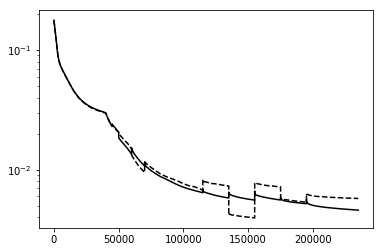

In [116]:
# plot loss
fig, ax = plt.subplots(1)
ax.plot(nn.ltst, "k--")
ax.plot(nn.ltrn, "k-")
ax.set_yscale('log')

In [117]:
# instantiate controller
cont = mlp_controller(nn)

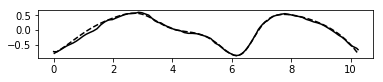

In [118]:
fig, ax = plt.subplots(1)
ax.plot(traj[:,0], traj[:,-1], "k--")
ax.plot(traj[:,0], cont.predict(traj[:,1:5]), "k-")
ax.set_aspect("equal")

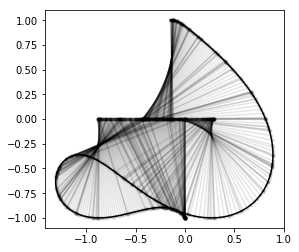

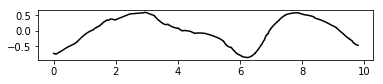

In [119]:
# simulate with neural network control
x0 = [0,0,np.pi,0]
dyn  = dynamics(x0,[0,0,0,0], 0)
t, x, u = dyn.propagate_controlled(9.8, cont)
ax = plot_traj(x, arm=True, n=500)
ax = plot_controls(t, u)

In [120]:
pickle.dump(nn, open("nn.p", "wb"))

In [ ]:
nn = pickle.load(open("nn.p", "rb"))

NameError: name 'nnn' is not defined

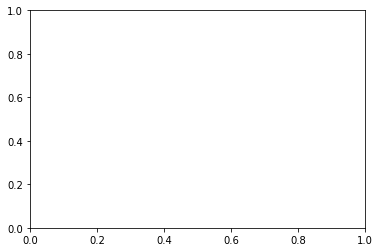

In [22]:
# plot loss
fig, ax = plt.subplots(1)
ax.plot(nnn.ltst, "k--")
ax.plot(nnn.ltrn, "k-")